# Installation

In [1]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [2]:
import pyspark
import seaborn as sns

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, hour, minute, second, lower, trim, round, when,month, year,avg, max, min, stddev, skewness, kurtosis


# Part 1, 2 - Schema Verification and Preprocessing

In [4]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Spotify Data Analysis") \
    .getOrCreate()

**Initialize SparkSession :**

SparkSession is the entry point to programming Spark with the Dataset and DataFrame API. We initialize it with an app name "Spotify Data Analysis".

**SparkSession.builder :** This is the starting point for creating a SparkSession. It's a builder pattern that allows you to set various options for the SparkSession before actually creating it.

**.appName("Spotify Data Analysis") :** This sets the name of the Spark application. It's mainly for display purposes in the Spark UI and logs. Here, we've named the application "Spotify Data Analysis" to indicate its purpose.

**.getOrCreate() :** This method tries to find an existing SparkSession to reuse, or if it doesn't exist, it creates a new one. It's useful when you're running Spark code in environments where a SparkSession might already exist, like a Jupyter Notebook or an interactive shell.

In [5]:
# Load the dataset
df = spark.read.parquet("data/spotify.parquet")

In [6]:
df.show(30)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+-----------------+--------------------+------------------+------------------+------------------+-----------+--------------+----+------------+
|                  id|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|     acousticness|    instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+--------

In [7]:
summary = df.describe()
summary.show()

+-------+--------------------+----------+---------------+--------------------+---------------------------+--------------------+-----------------+-------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|                  id|      name|          album|            album_id|                    artists|          artist_ids|     track_number|        disc_number|       danceability|             energy|              key|           loudness|               mode|        speechiness|       acousticness|   instrumentalness|           liveness|            valence|             tempo|       duration_ms|    time_signature|              year|      release_date|
+-------+--------------------+----------+---------------+--------------------+----

In [8]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)



**Check the schema :**

We print the schema of the DataFrame to understand its structure. This step helps us understand the columns present in the dataset and their data types.

when we see nullable = true in the schema, it means that the corresponding column in the DataFrame can contain null values.


| Variable       | Explanation                                                                                       |
|----------------|---------------------------------------------------------------------------------------------------|
| id | The Spotify ID for the track |
| artists | The artists' names who performed the track. If there is more than one artist, they are separated by a ; |
| album_name | The album name in which the track appears |
| track_name | Name of the track |
| duration_ms | The track length in milliseconds |
| explicit | Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown) |
| danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1 |
| loudness | The overall loudness of a track in decibels (dB) |
| mode | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0 |
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks |
| acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic |
| instrumentalness | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live |
| valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration |
| time_signature | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4. |

Here we want to see how many unique songs are there in the dataset

In [9]:
# how many unique songs are there in the dataset?
df.select(["name","artist_ids"]).distinct().count()

1141721

In [10]:
# how many unique songs are there in the dataset?
df.select(["id"]).distinct().count()

1204025

We use a list comprehension to iterate over all columns in the DataFrame (df.columns).
For each column, we use isNull() function to create a boolean column indicating whether each value is null.
We cast the boolean column to integer using cast("int") so that we can use sum() function to count the number of null values.
Finally, we use select() to display the counts of null values for each column.

In [11]:
from pyspark.sql.functions import col, sum as spark_sum, when

def count_null_values(df):
    # Use a list comprehension to count the null values for each column
    null_counts = df.select([spark_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])
    return null_counts


In [12]:
result = count_null_values(df)
result.show()

+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+--------------+----+------------+
| id|name|album|album_id|artists|artist_ids|track_number|disc_number|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|duration_ms|time_signature|year|release_date|
+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+--------------+----+------------+
|  0|   3|   11|       0|      0|         0|           0|          0|       0|           0|     0|  0|       0|   0|          0|           0|               0|       0|      0|    0|          0|             0|   0|           0|
+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+-

Here we check for null values

In [13]:
from pyspark.sql import functions as F

def count_none_names(df, name_column):
    none_names = df.filter(F.col(name_column).isNull())
    none_names.show()
    print("Number of rows where the name column is None: ", none_names.count())

In [14]:
count_none_names(df , 'name')

+--------------------+----+-------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------------------+---+--------+----+-----------+------------+------------------+--------+------------------+-------+-----------+--------------+----+------------+
|                  id|name|              album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|danceability|            energy|key|loudness|mode|speechiness|acousticness|  instrumentalness|liveness|           valence|  tempo|duration_ms|time_signature|year|release_date|
+--------------------+----+-------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------+------------------+---+--------+----+-----------+------------+------------------+--------+------------------+-------+-----------+--------------+----+------------+
|7r3l7R0Ob1XcRk6wo...|NULL|Distort Neura

In [15]:
count_none_names(df , 'album')

+--------------------+--------------------+-----+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+--------+----+-----------+------------------+------------------+------------------+------------------+------------------+-----------+--------------+----+------------+
|                  id|                name|album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|loudness|mode|speechiness|      acousticness|  instrumentalness|          liveness|           valence|             tempo|duration_ms|time_signature|year|release_date|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+--------+----+-----------+------------------+------------------+------------------+------------------+

After checking the null songs, we came to the conclusion that the names of these songs or albums were None, which were incorrectly saved as null after entering the system, which we will correct all of them.

In [16]:
df = df.fillna("None")

result = count_null_values(df)
result.show()

+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+--------------+----+------------+
| id|name|album|album_id|artists|artist_ids|track_number|disc_number|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo|duration_ms|time_signature|year|release_date|
+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-----+-----------+--------------+----+------------+
|  0|   0|    0|       0|      0|         0|           0|          0|       0|           0|     0|  0|       0|   0|          0|           0|               0|       0|      0|    0|          0|             0|   0|           0|
+---+----+-----+--------+-------+----------+------------+-----------+--------+------------+-

In [17]:
def Count_unique(column):
    # Count the number of unique IDs
    unique_id_count = df.select(column).distinct().count()

    print(f"Number of unique {column}:", unique_id_count)
Count_unique("id")
Count_unique("artists")
Count_unique("artist_ids")
print("Dataset Shape using spark syntax:\n",(df.count(), len(df.columns)))

Number of unique id: 1204025
Number of unique artists: 165365
Number of unique artist_ids: 166423
Dataset Shape using spark syntax:
 (1204025, 24)


We can see that the number of 'id' is exactly as number of rows in the dataset .So we can drop it Because it is acting like index.

In [18]:
df = df.drop("id")

For release_date we changed every string form to yyyy-MM-DD form and create column year and day and month

In [19]:
from pyspark.sql.functions import col, to_date, year, dayofmonth
df = df.withColumn("release_date_formated", to_date(col("release_date"), "yyyy-MM-dd"))

In [20]:
from pyspark.sql.functions import col, date_format

df = df.withColumn("release_month", month(df["release_date_formated"]))
df = df.withColumn("release_day", dayofmonth(df["release_date_formated"]))
df = df.withColumn("release_week", date_format(col("release_date"), "EEEE"))

In [21]:
mismatched_rows = df.filter(year(df["release_date"]) != df["year"])
print("Number of rows where release_year and year do not match:", mismatched_rows.count())

Number of rows where release_year and year do not match: 0


In [22]:
def show_null_release_date_rows():
    null_release_date_rows = df.filter(df["release_date_formated"].isNull())
    print(null_release_date_rows.count())
    null_release_date_rows.show()

In [23]:
show_null_release_date_rows()

131186
+--------------------+------------------+--------------------+-----------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+------------------+--------------------+------------------+------------------+-------+-----------+--------------+----+------------+---------------------+-------------+-----------+------------+
|                name|             album|            album_id|    artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|      acousticness|    instrumentalness|          liveness|           valence|  tempo|duration_ms|time_signature|year|release_date|release_date_formated|release_month|release_day|release_week|
+--------------------+------------------+--------------------+-----------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+

As you can see, after converting to the yyyy-mm-dd format, some lines became null, the reason being that the release_date was not in this format, and we store the corresponding day and month as zero.

In [24]:
from pyspark.sql.functions import lit

df = df.fillna({'release_month': 0, 'release_day': 0})
show_null_release_date_rows()


131186
+--------------------+------------------+--------------------+-----------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+------------------+--------------------+------------------+------------------+-------+-----------+--------------+----+------------+---------------------+-------------+-----------+------------+
|                name|             album|            album_id|    artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|           loudness|mode|speechiness|      acousticness|    instrumentalness|          liveness|           valence|  tempo|duration_ms|time_signature|year|release_date|release_date_formated|release_month|release_day|release_week|
+--------------------+------------------+--------------------+-----------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+

In [25]:
# Preprocess 'duration_ms' column (convert milliseconds to minutes)
df = df.withColumn("duration_minutes", round(col("duration_ms") / 60000))

We converted "artists, album, name" columns to lower case

In [26]:
# Preprocess string columns (convert to lowercase, remove leading/trailing whitespace)
string_columns = ["artists", "album", "name"]
for col_name in string_columns:
    df = df.withColumn(col_name, lower(trim(col(col_name))))

Convert explicit col to numerical variable (true = 1, false = 0).

In [27]:
df = df.withColumn("explicit", when(df["explicit"] == True, 1).otherwise(0))

# Part 3, 4 - Aggregation and Transformation and Selection and Explosion for Insights

First, we identify all the numerical variables.

In [28]:
data_types = df.dtypes
numerical_columns = [column[0] for column in data_types if column[1] in ('double', 'float', 'long', 'short', 'byte', 'bigint', 'int')]
for column in numerical_columns:
    print(column)

track_number
disc_number
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
time_signature
year
release_month
release_day
duration_minutes


Now we will examine some variables.We define the eda function and apply it to all these variables.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def do_eda_for_variable(df, variable, bins):
    numerical_columns = [variable]
    data = df.select(*numerical_columns).toPandas()

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram distribution
    ax = axes[0]
    ax.hist(data[variable], bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(variable.capitalize() + " Distribution")
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel("Frequency")

    # Violin plot
    ax = axes[1]
    sns.violinplot(data=data, x=variable, ax=ax)
    ax.set_title(variable.capitalize() + " Violin Plot")
    ax.set_xlabel(variable.capitalize())

    # Box plot
    ax = axes[2]
    sns.boxplot(data=data, x=variable, ax=ax)
    ax.set_title(variable.capitalize() + " Box Plot")
    ax.set_xlabel(variable.capitalize())

    plt.tight_layout()
    plt.show()

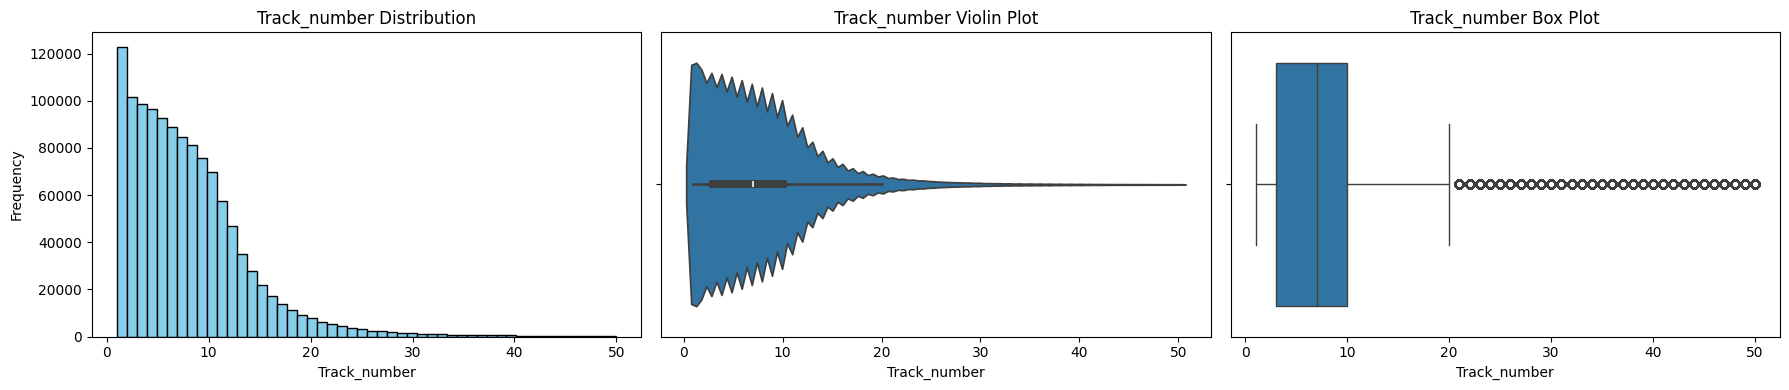

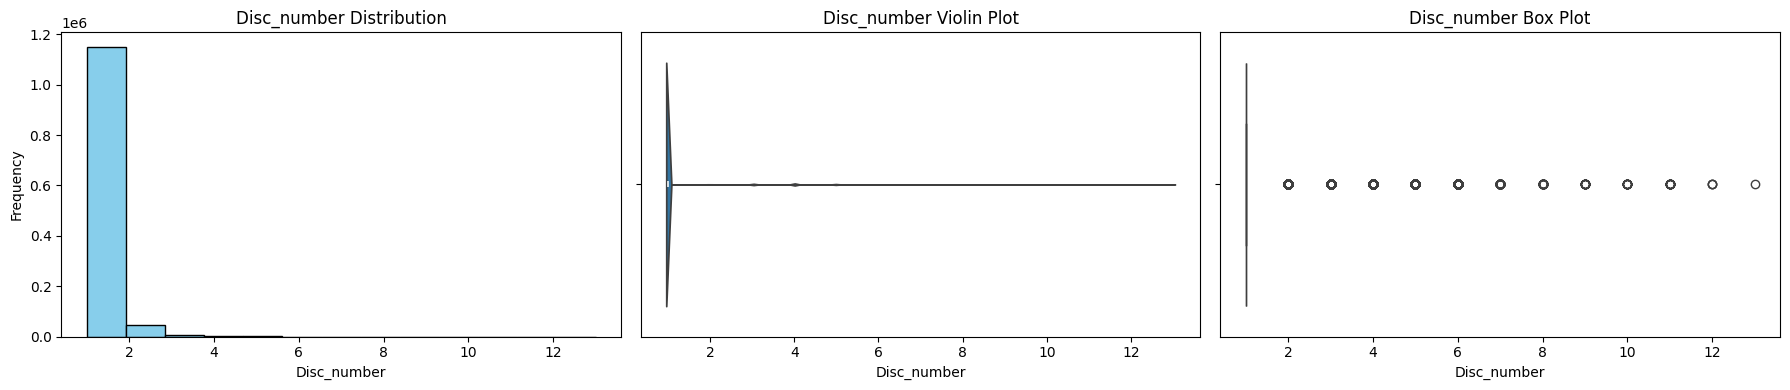

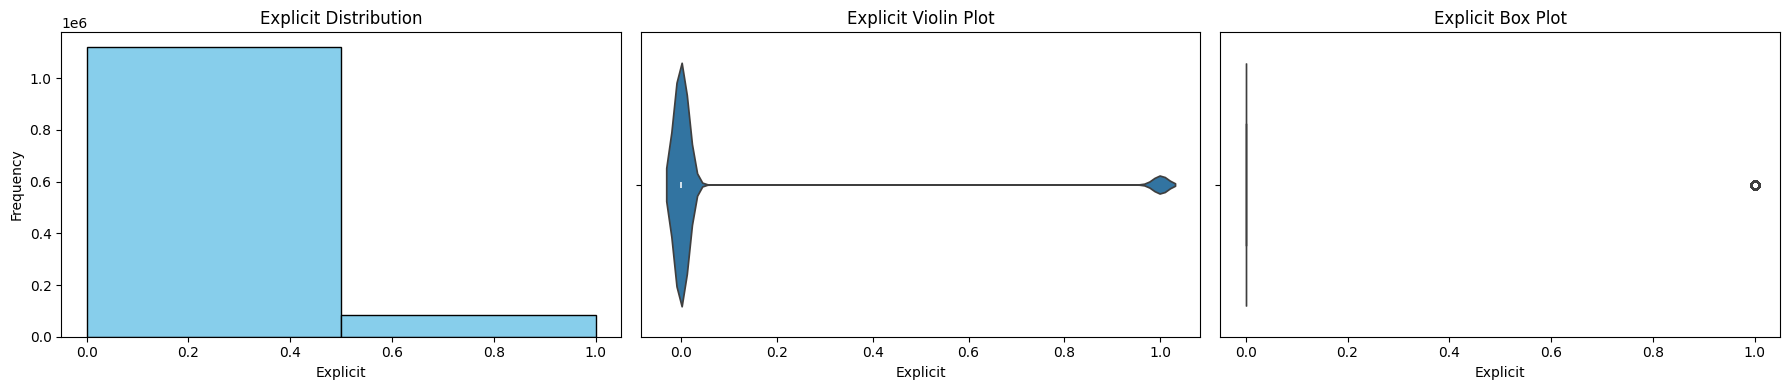

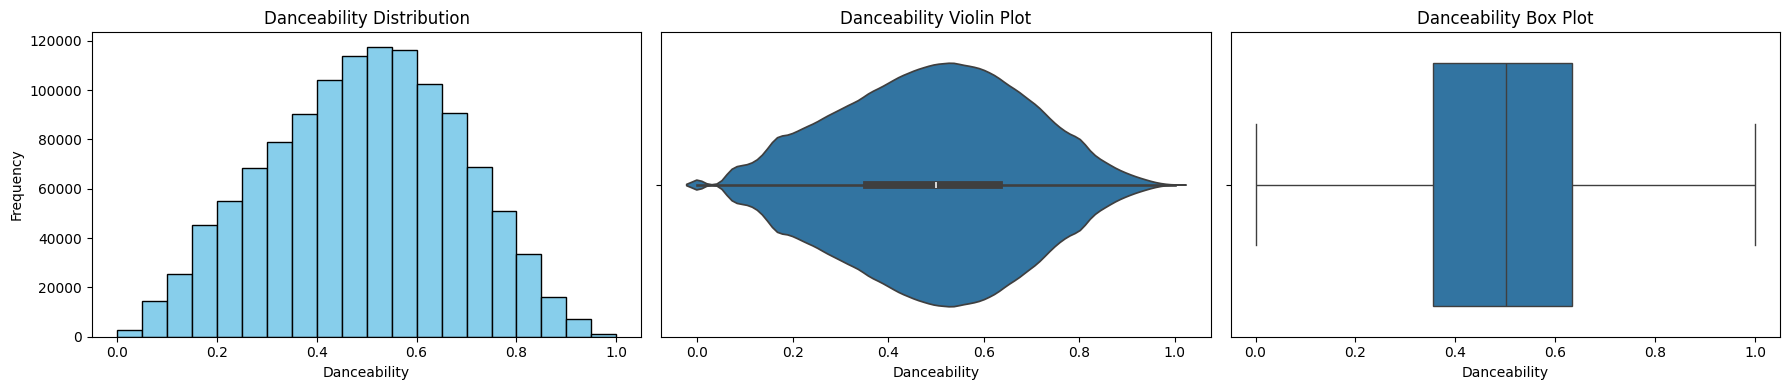

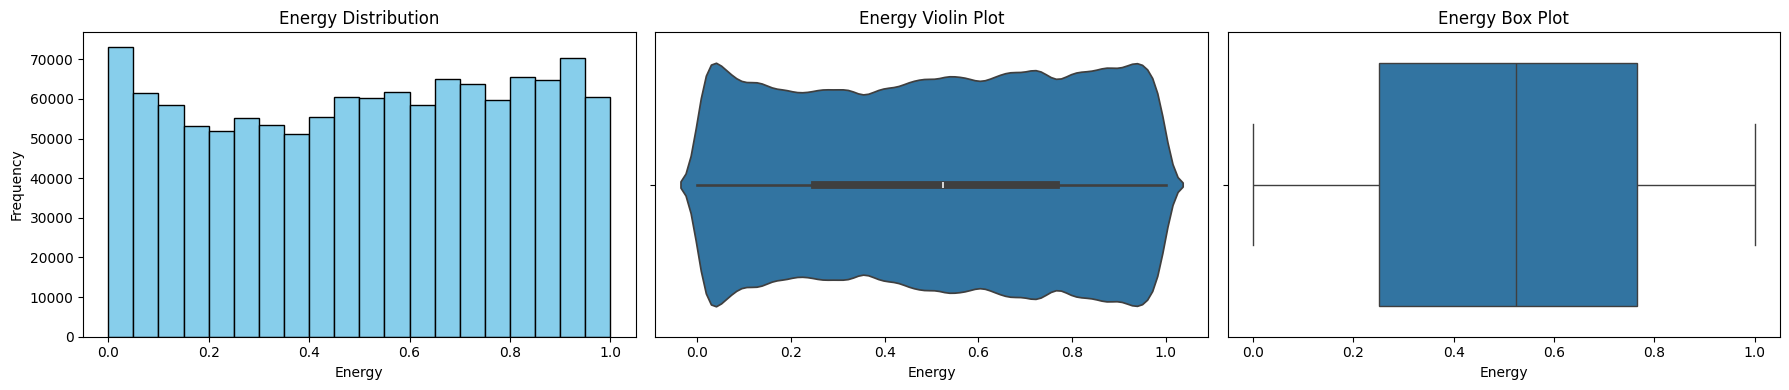

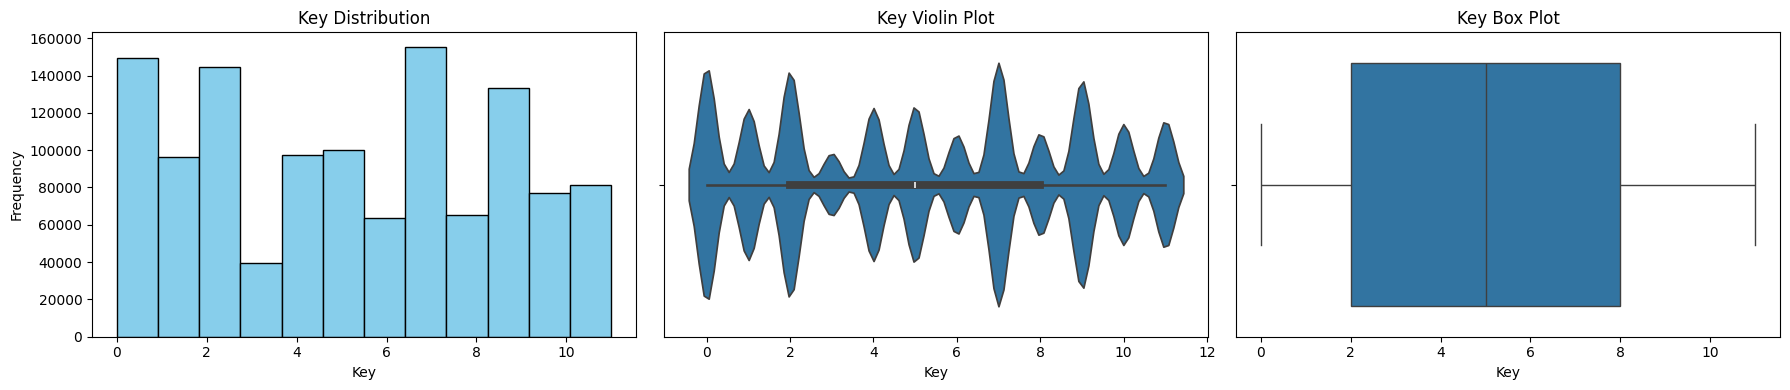

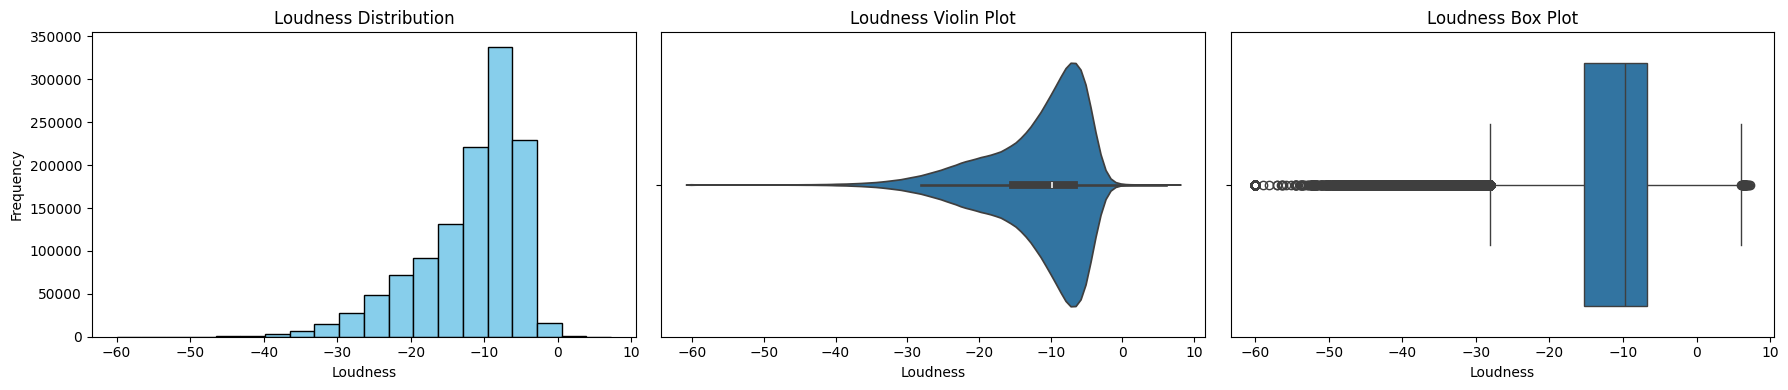

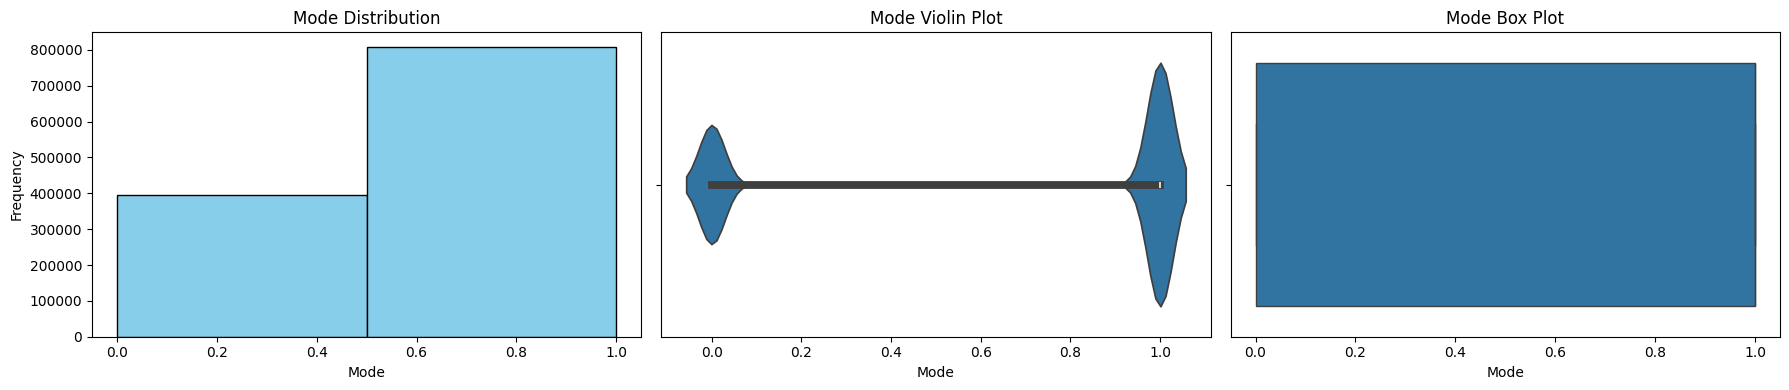

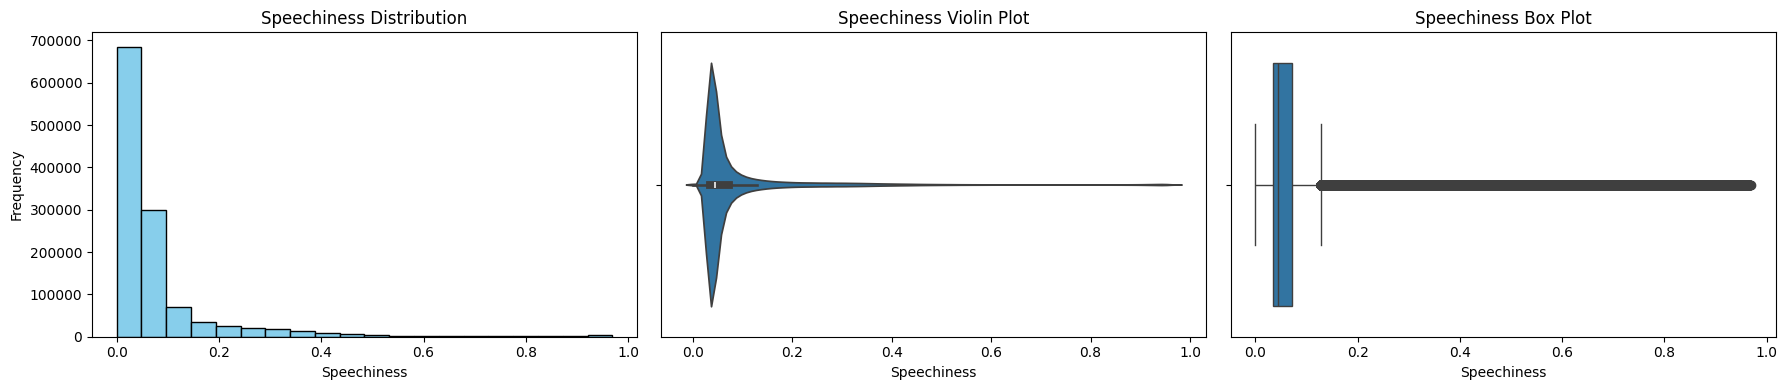

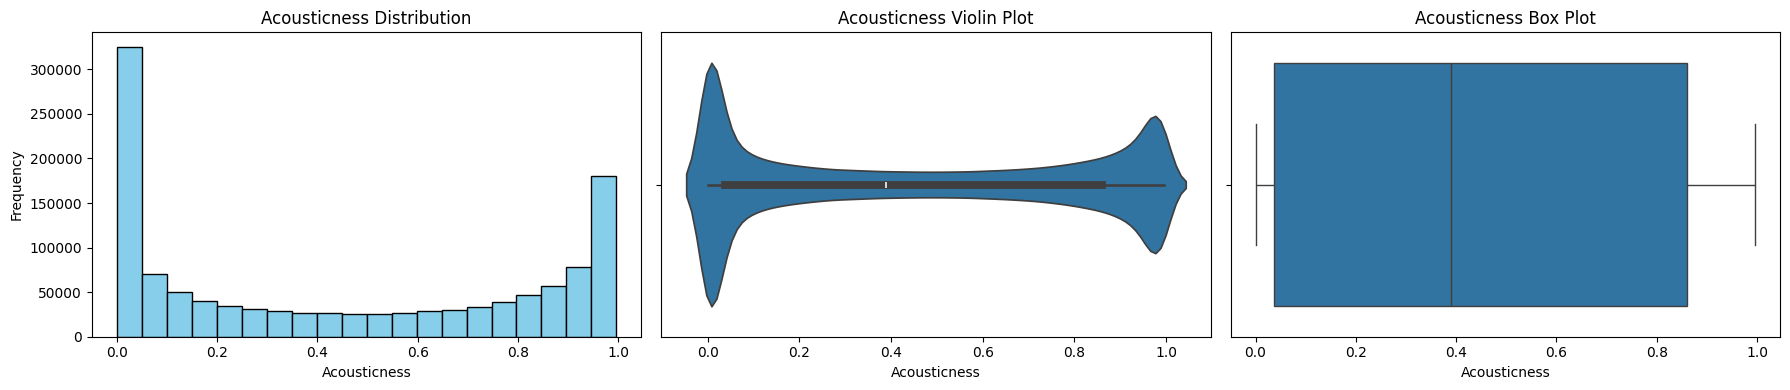

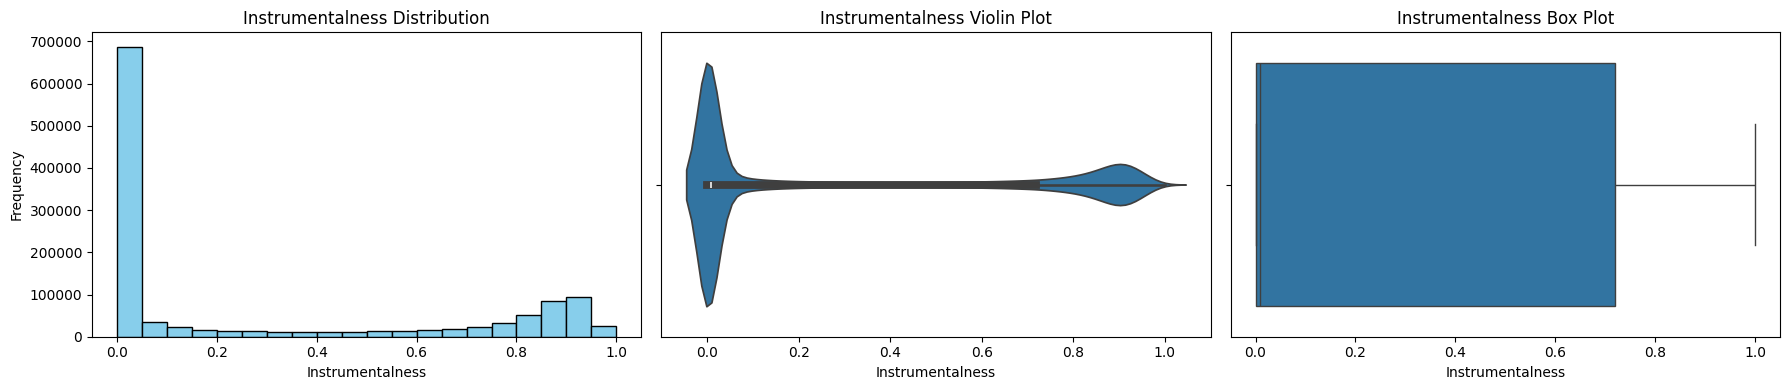

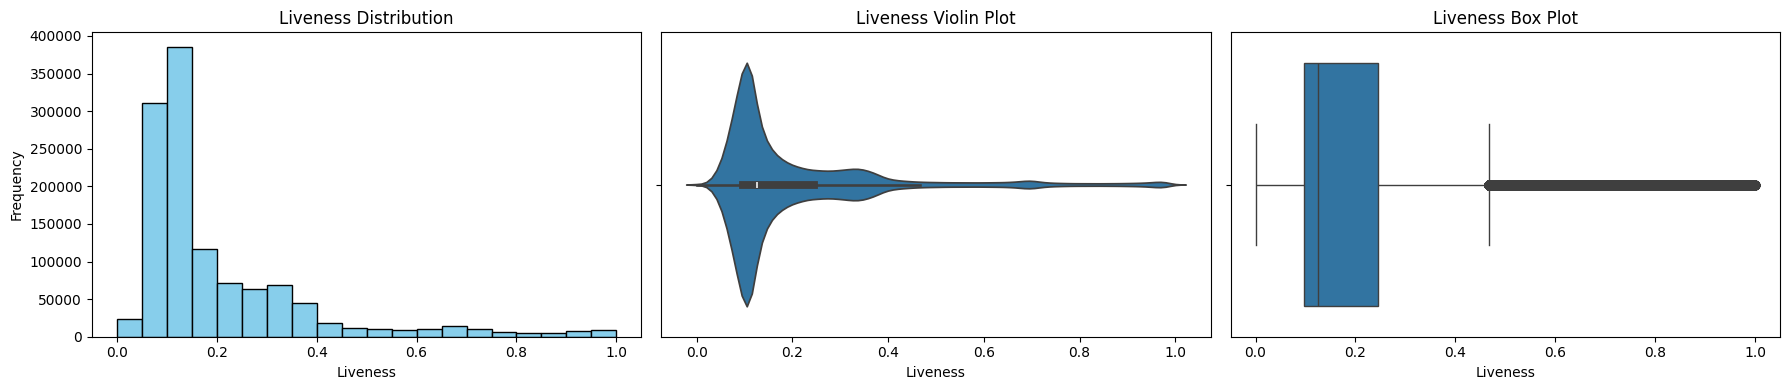

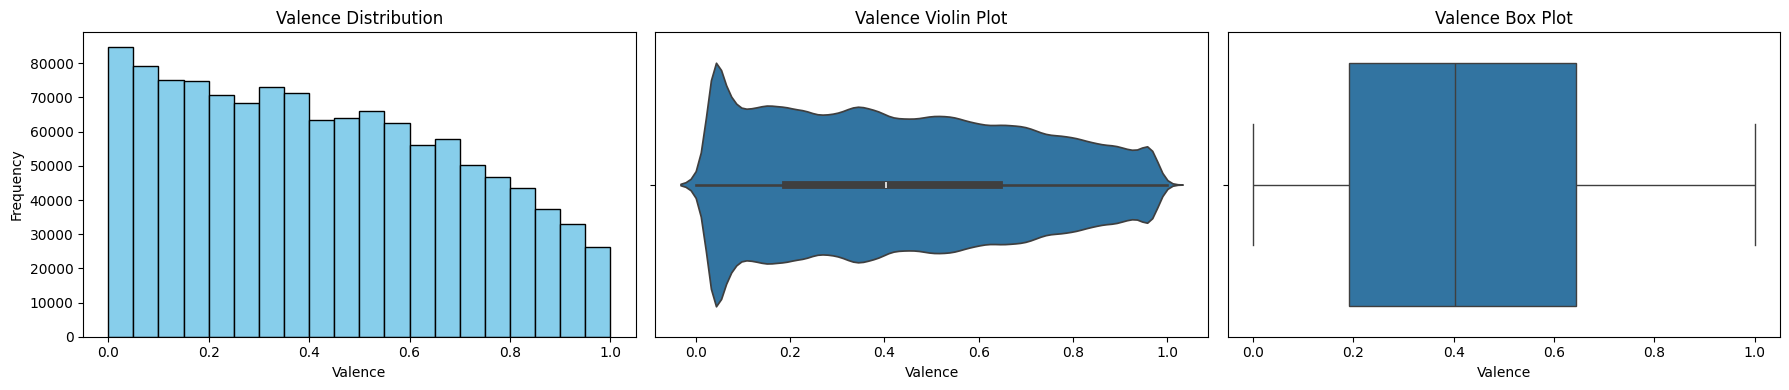

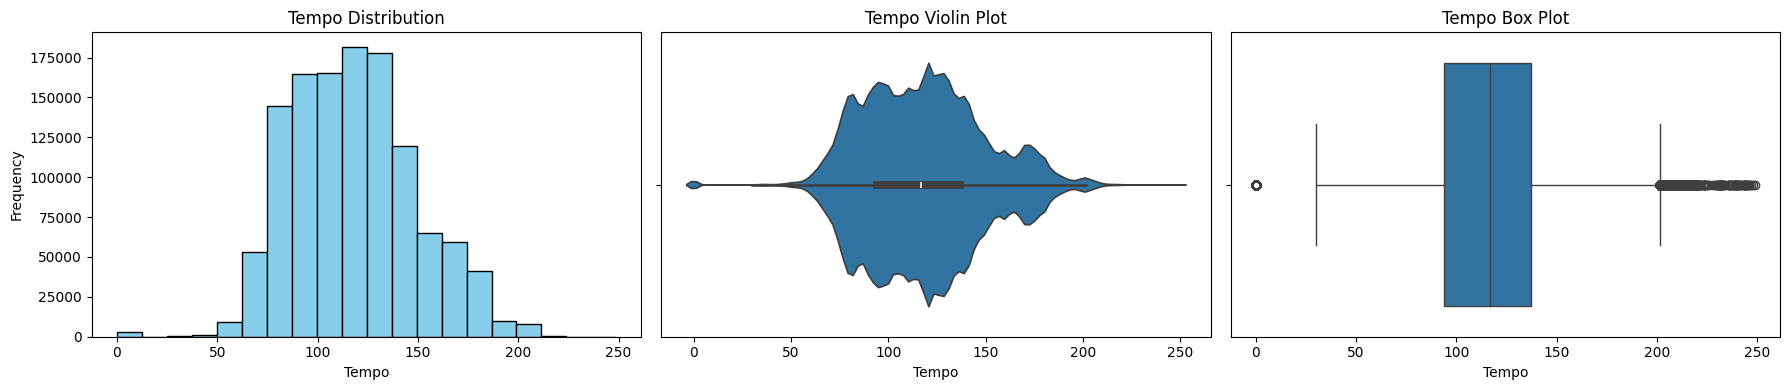

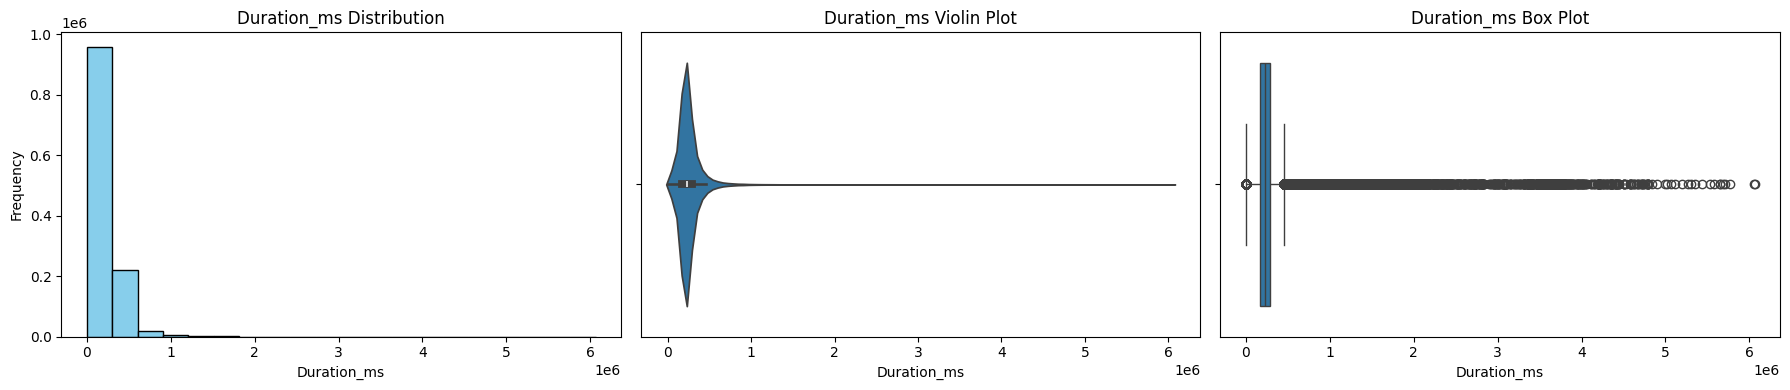

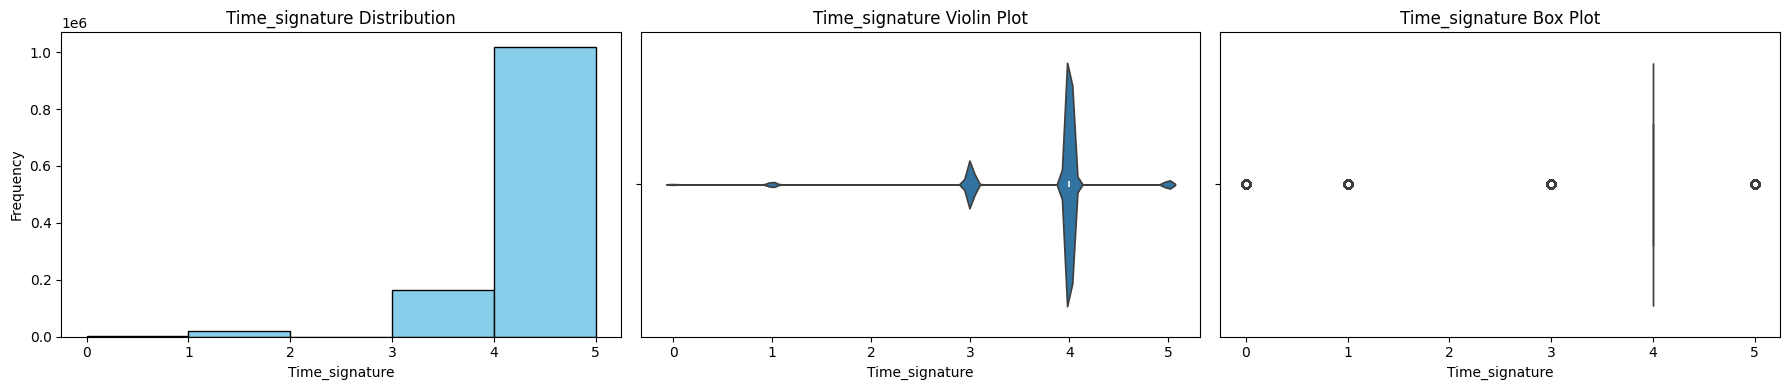

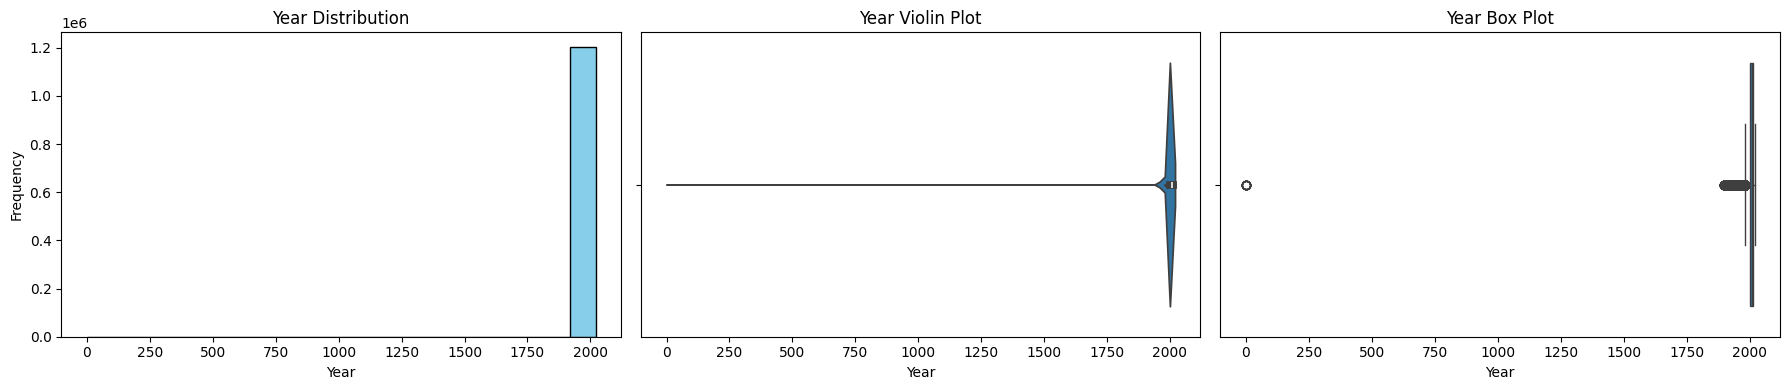

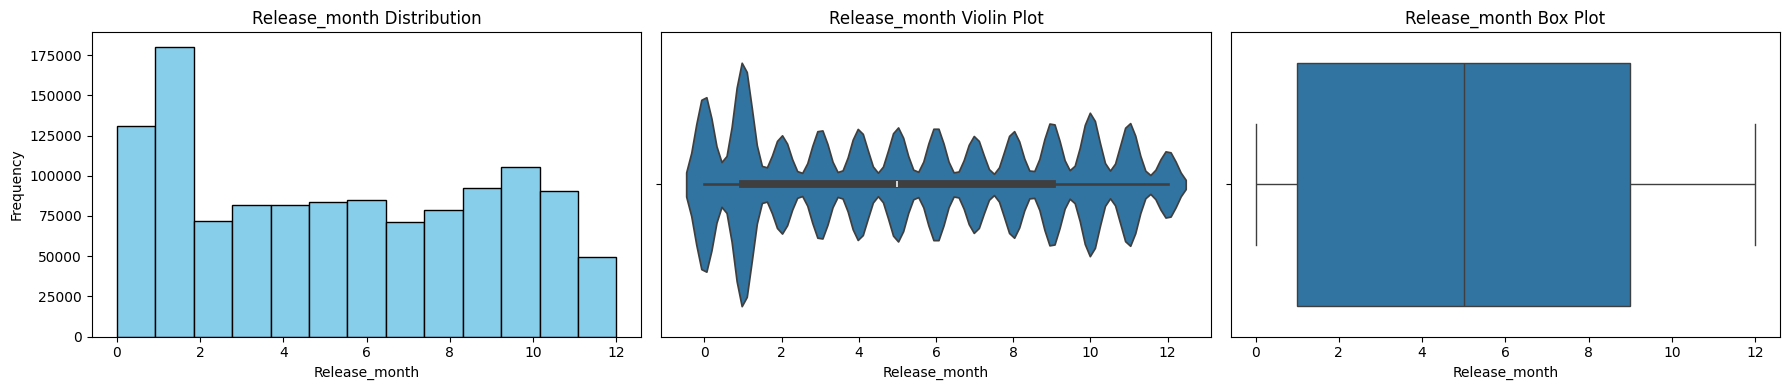

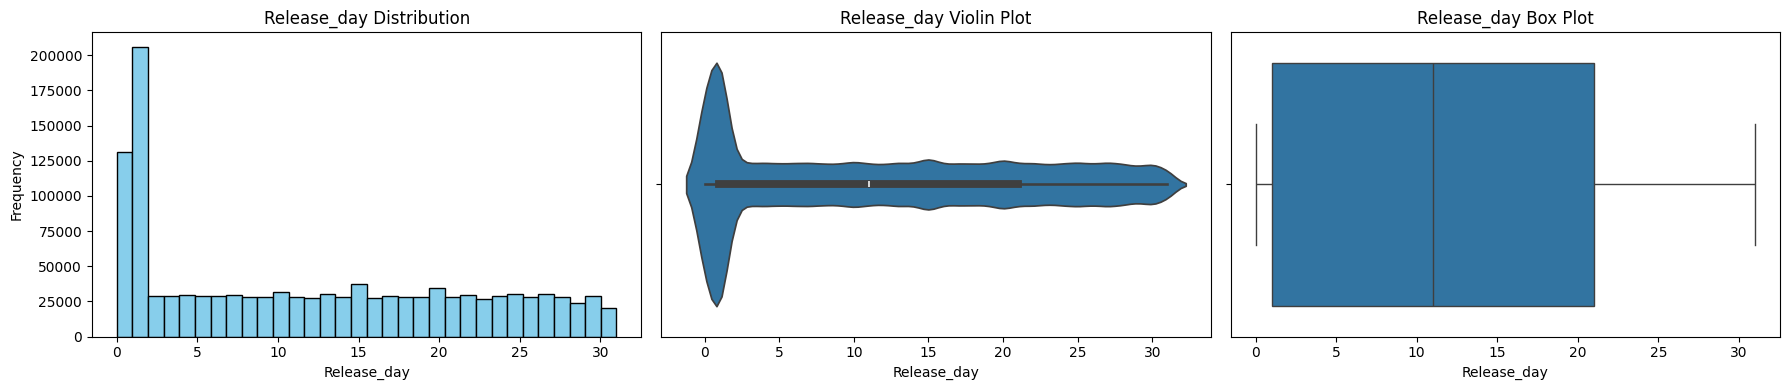

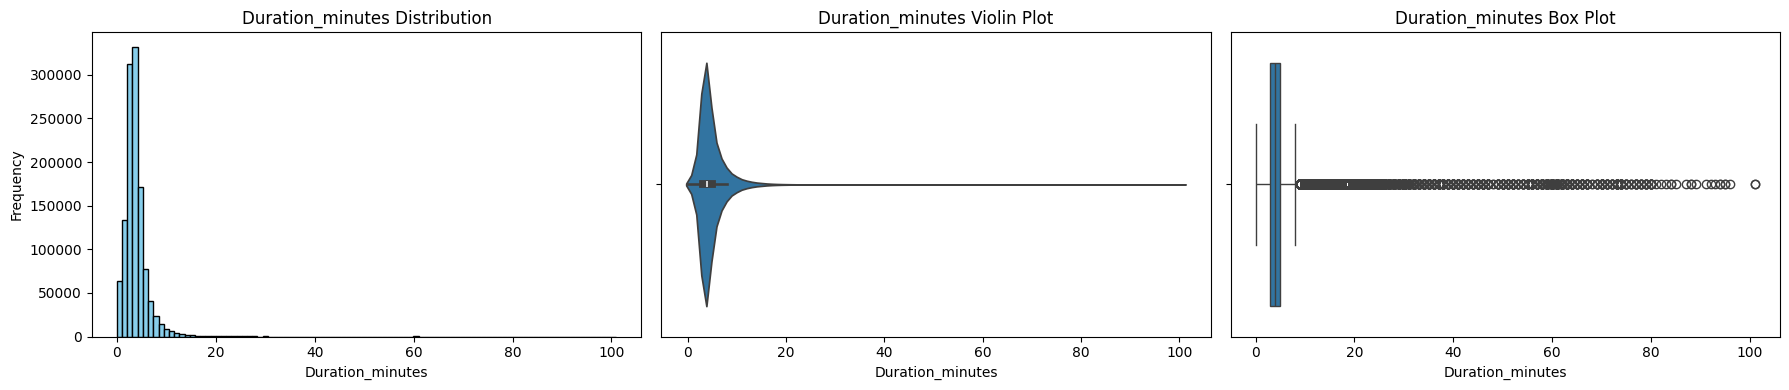

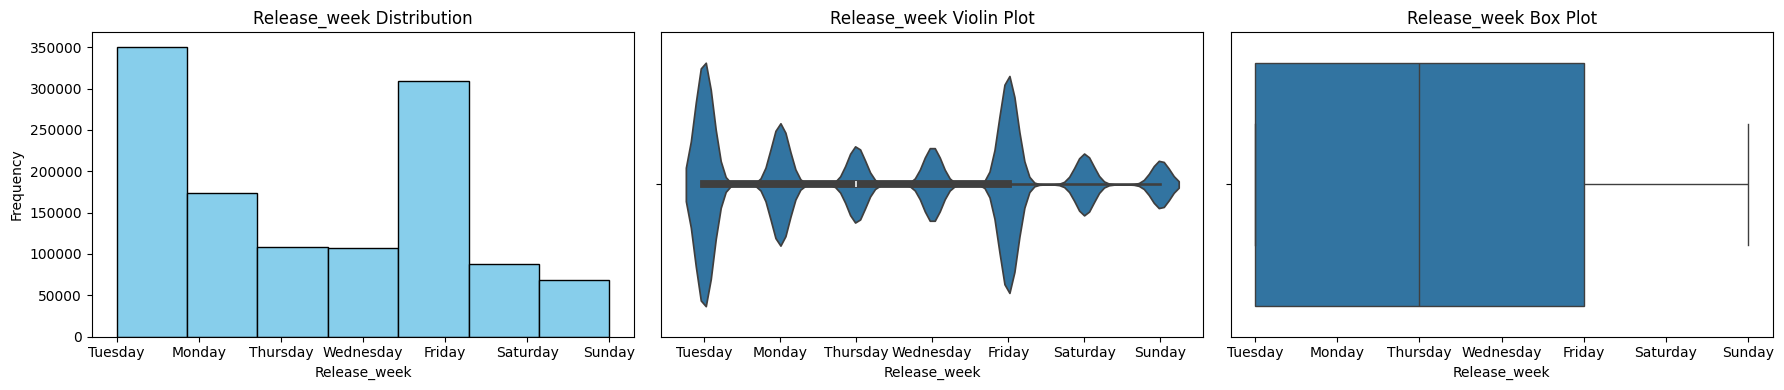

In [30]:
should_do_eda_variables = numerical_columns + ["release_week"]
for col in should_do_eda_variables:
    bin_size = df.select([col]).distinct().count()
    bin_size = 20 if bin_size > 100 else bin_size
    do_eda_for_variable(df, col, bin_size)

- track_number: The right-skewed distribution suggests that albums or playlists tend to have more tracks assigned to lower track numbers. This skewness could arise from practices like reserving higher track numbers for bonus tracks, or artists intentionally structuring their albums with more impactful or popular songs towards the beginning.

- disc_number: The heavy skew towards lower values is expected, as most albums are single-disc releases. The distribution likely reflects the lower frequency of multi-disc albums in the dataset.

- danceability: The roughly normal distribution implies that songs span a broad range of danceability levels, catering to various preferences and genres. The central tendency could suggest that moderately danceable tracks are more common or preferred.

- energy: The approximately normal distribution indicates a balance between high and low energy tracks in the dataset. The slight skew towards higher energy levels could be attributed to the popularity of upbeat, energetic music for certain genres or listening contexts.

- key: The relatively uniform distribution across different key values suggests that key signatures are evenly represented in the dataset, with no particular key being overly favored or underrepresented.

- loudness: The normal distribution of loudness levels could stem from industry practices and guidelines for audio mastering and normalization, aiming to maintain a consistent listening experience across tracks and albums.

- mode: The higher frequency of major keys aligns with the general preference for major tonalities in popular music, as they are often perceived as more upbeat and positive.

- speechiness: The heavy right skew towards lower speechiness scores is expected, as most popular music tracks are primarily instrumental or contain minimal spoken content.

- acousticness: The slight skew towards lower acousticness values could reflect the prevalence of electronic and heavily produced music genres, which rely less on acoustic instrumentation.

- instrumentalness: The skew towards lower instrumentalness scores suggests that most tracks in the dataset contain vocals, which is common for mainstream popular music genres.

- liveness: The heavy right skew towards lower liveness scores aligns with the expectation that most commercially released music is studio-recorded rather than live recordings.

- valence: The roughly normal distribution with a slight skew towards higher valence scores could indicate a preference for more positive and uplifting musical tones in popular music.

- tempo: The normal tempo distribution suggests a balanced representation of various tempos in the dataset, catering to different musical genres and preferences.

- duration_ms: The right-skewed distribution towards shorter durations is likely due to the prevalence of radio-friendly song lengths and the commercial demand for concise, well-paced tracks.

- time_signature: The higher frequency of common time signatures like 4/4 is expected, as they are the most widely used meters in popular Western music genres.

- duration_minutes: The right-skewed distribution, mirroring that of duration_ms, reinforces the observation that shorter track lengths are more common in the dataset, potentially driven by commercial and listener preferences for concise songs.

- explicit: Most of the songs do not contain explicit, and if there are many of these cases, we should check them


- year: The distribution in this section and the skew to the left means that most of our data is for recent years, and for further investigation, we must remove outliers, i.e. less than 1990.

- release_month: With a general look, you can understand that the distribution between different months is almost the same, but it seems that the first two months are considered the best time to release a song.

- release_day: It seems that the first two days of the month have the highest amount of publication, and the distribution is almost the same for the rest of the month

- release_week: Our plots confirm the industry norm of releasing music primarily on Fridays (Global Release Day), with Mondays being a secondary preference. This trend likely stems from marketing strategies and listener engagement patterns, aimed at maximizing visibility and sales. It seems that the mainstream companies choose the end of the week to release, and the rest of the time to attract more attention, they release their songs with the biggest time difference from them in order to attract more attention.

## Outliers

In [31]:
from pyspark.sql.functions import col
import math

variables_should_eda_for_outliers = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "explicit"]

def get_outliers_row(df, variable, show_rows=False):
    q1, q3 = df.approxQuantile(variable, [0.25, 0.75], 0.01)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f'lower whisker: {lower_bound}, upper whisker: {upper_bound}')

    outliers = df.filter((col(variable) < lower_bound) | (col(variable) > upper_bound))
    
    print("Number of outliers:", outliers.count())
    if show_rows:
        outliers.select(variable).show()
        outliers.show()
    
    return outliers

def plot_variable_distribution(df):
    num_variables = len(variables_should_eda_for_outliers)
    num_rows = (num_variables + 4) // 5  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows*4))  # Adjust the figure size accordingly

    for i, variable in enumerate(variables_should_eda_for_outliers):
        numerical_columns = [variable]
        data = df.select(numerical_columns).toPandas()

        bin_size = df.select(variable).distinct().count()
        bin_size = 20 if bin_size > 100 else bin_size

        row_index = i // 5
        col_index = i % 5

        ax = axes[row_index, col_index]
        ax.hist(data[variable], bins=bin_size, color='skyblue', edgecolor='black')
        ax.set_title(variable.capitalize() + " Distribution")
        ax.set_xlabel(variable.capitalize())
        ax.set_ylabel("Frequency")

    for i in range(num_variables, num_rows*5):
        row_index = i // 5
        col_index = i % 5
        fig.delaxes(axes[row_index, col_index])

    plt.tight_layout()
    plt.show()


Here we examine the outliers of the variables

### speechiness

In [32]:
variable = 'speechiness'
speechiness_outliers = get_outliers_row(df, variable)

lower whisker: -0.020550000000000006, upper whisker: 0.12785000000000002
Number of outliers: 168581


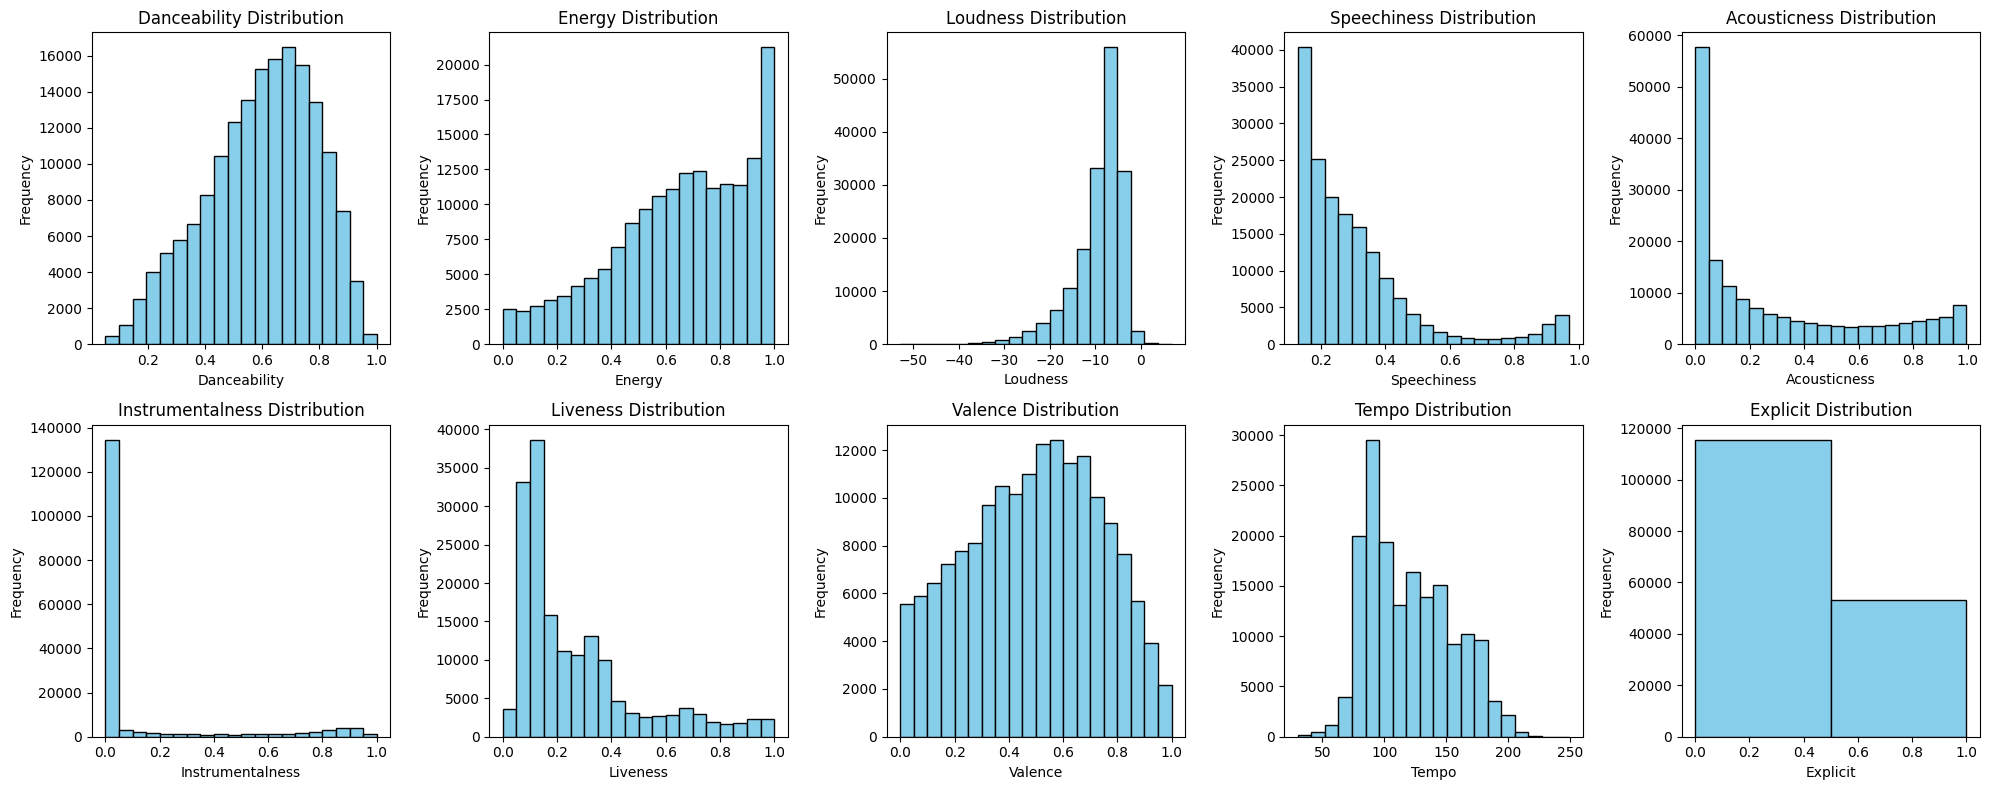

In [33]:
plot_variable_distribution(speechiness_outliers)

It can be seen that in the speechiness_outliers, which were all above the high whisker, the energy is more than the original distribution, and valence and tempo are skewed to the left instead of to the right. Also, acousticness has a more severe skew to the right.
Also, the level of explicitness has also increased compared to the rest of the data, which is logical. Probably the songs that are mostly rap are placed here and these songs use more vulgar words.

### liveness

In [34]:
variable = 'liveness'
liveness_outliers = get_outliers_row(df, variable)

lower whisker: -0.121, upper whisker: 0.4598
Number of outliers: 97927


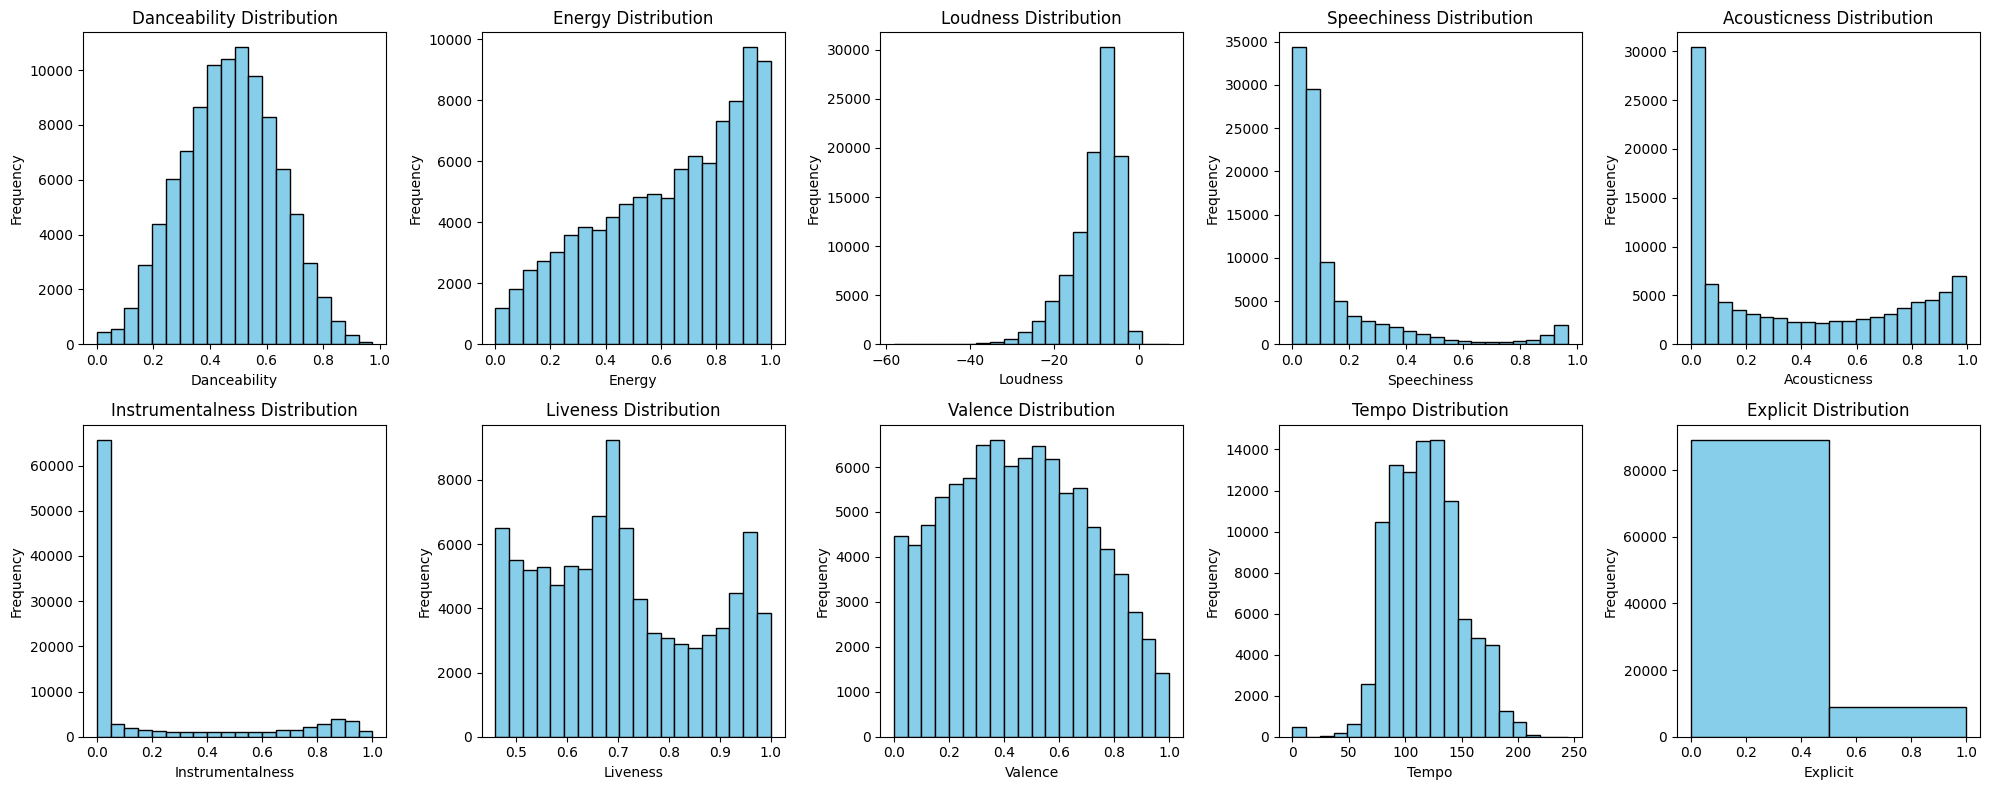

In [35]:
plot_variable_distribution(liveness_outliers)

We can only say that the energy has increased and we have a bias to the right.

### year

In [36]:
variable = 'year'
year_outliers = get_outliers_row(df, variable, show_rows=True)

lower whisker: 1985.0, upper whisker: 2033.0
Number of outliers: 41131
+----+
|year|
+----+
|1984|
|1984|
|1984|
|1984|
|1984|
|1984|
|1984|
|1984|
|1984|
|1973|
|1973|
|1973|
|1973|
|1973|
|1973|
|1973|
|1973|
|1973|
|1973|
|1973|
+----+
only showing top 20 rows

+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+--------+----+-----------+------------------+----------------+------------------+------------------+-------+-----------+--------------+----+------------+---------------------+-------------+-----------+------------+----------------+
|                name|               album|            album_id|             artists|          artist_ids|track_number|disc_number|explicit|      danceability|            energy|key|loudness|mode|speechiness|      acousticness|instrumentalness|          liveness|           valence|  tempo|duration_ms|time_signature|year

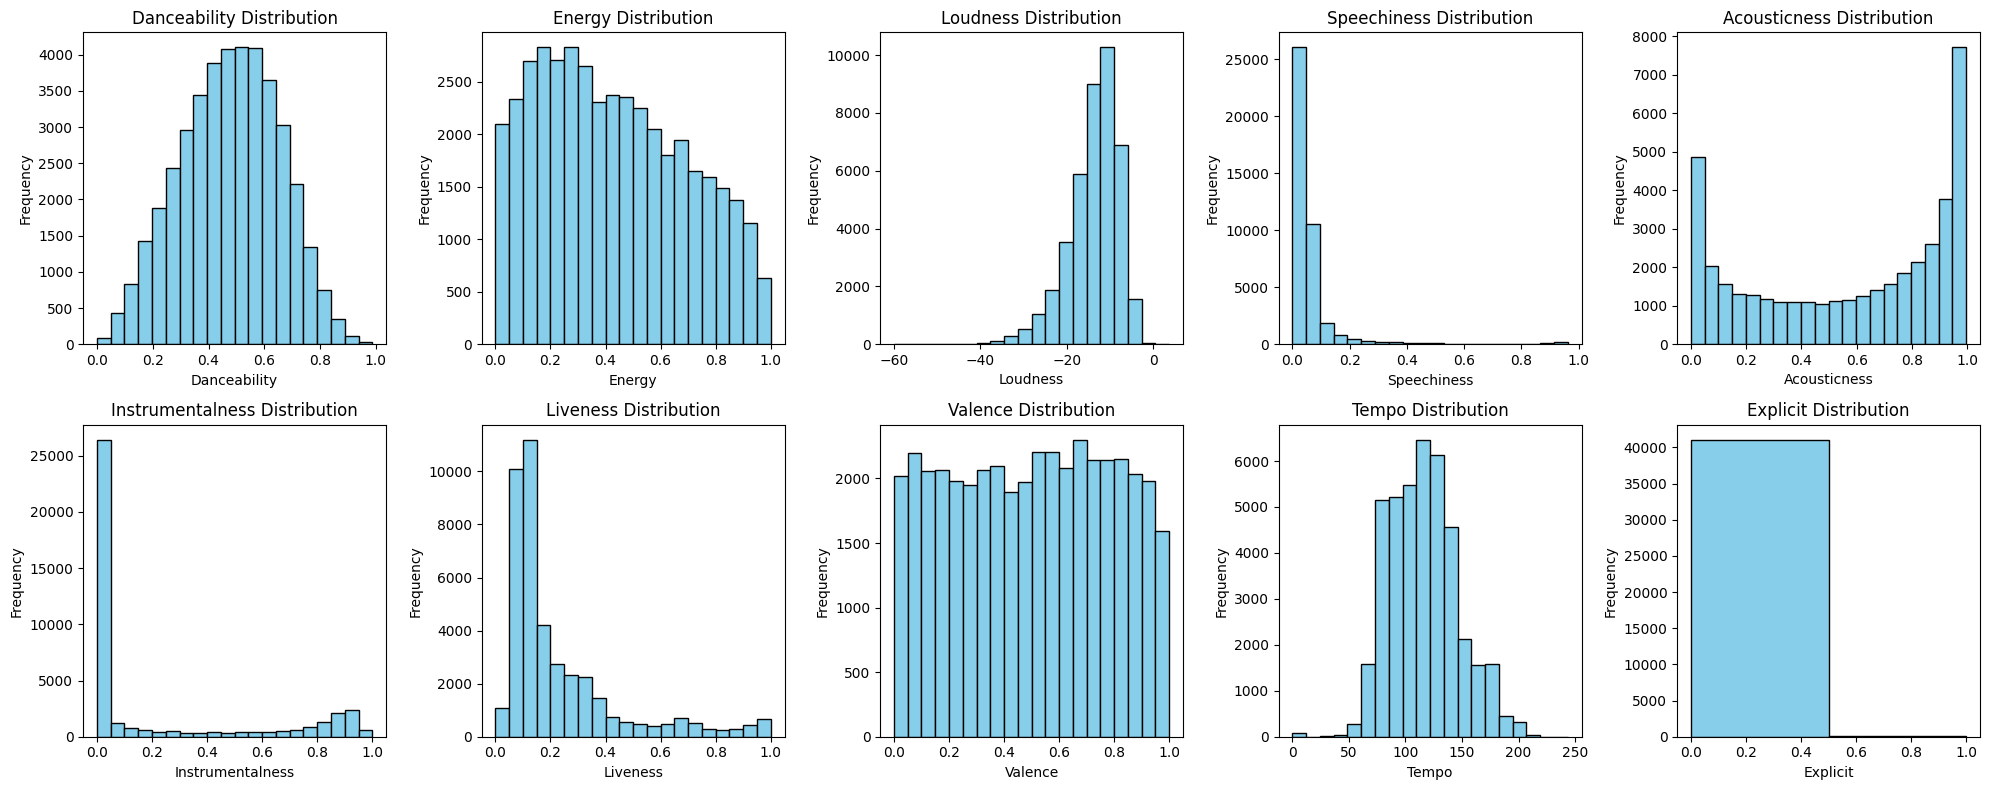

In [37]:
plot_variable_distribution(year_outliers)

In this section, year_outliers, all our outliers are related to the past years and less than 1985. Energy is skewed to the right. Also, the acousticness is more skewed to the left and it is the opposite of the whole data, which can be because of the time period we are examining it and in the past the songs had less acousticness.
Also, the amount of explicitness here is almost zero, which shows that vulgar words are rarely used in old songs.

### duration_minute

In [38]:
variable = 'duration_minutes'
duration_minutes_outliers = get_outliers_row(df, variable, show_rows=True)

lower whisker: 0.0, upper whisker: 8.0
Number of outliers: 47020
+----------------+
|duration_minutes|
+----------------+
|             9.0|
|            11.0|
|            11.0|
|            13.0|
|             9.0|
|             9.0|
|            11.0|
|             9.0|
|             9.0|
|            13.0|
|            10.0|
|            13.0|
|            15.0|
|            11.0|
|            11.0|
|            11.0|
|            41.0|
|             9.0|
|            10.0|
|            13.0|
+----------------+
only showing top 20 rows

+--------------------+--------------------+--------------------+--------------------+--------------------+------------+-----------+--------+------------------+------------------+---+-------------------+----+-----------+------------------+------------------+------------------+------------------+------------------+-----------+--------------+----+------------+---------------------+-------------+-----------+------------+----------------+
|              

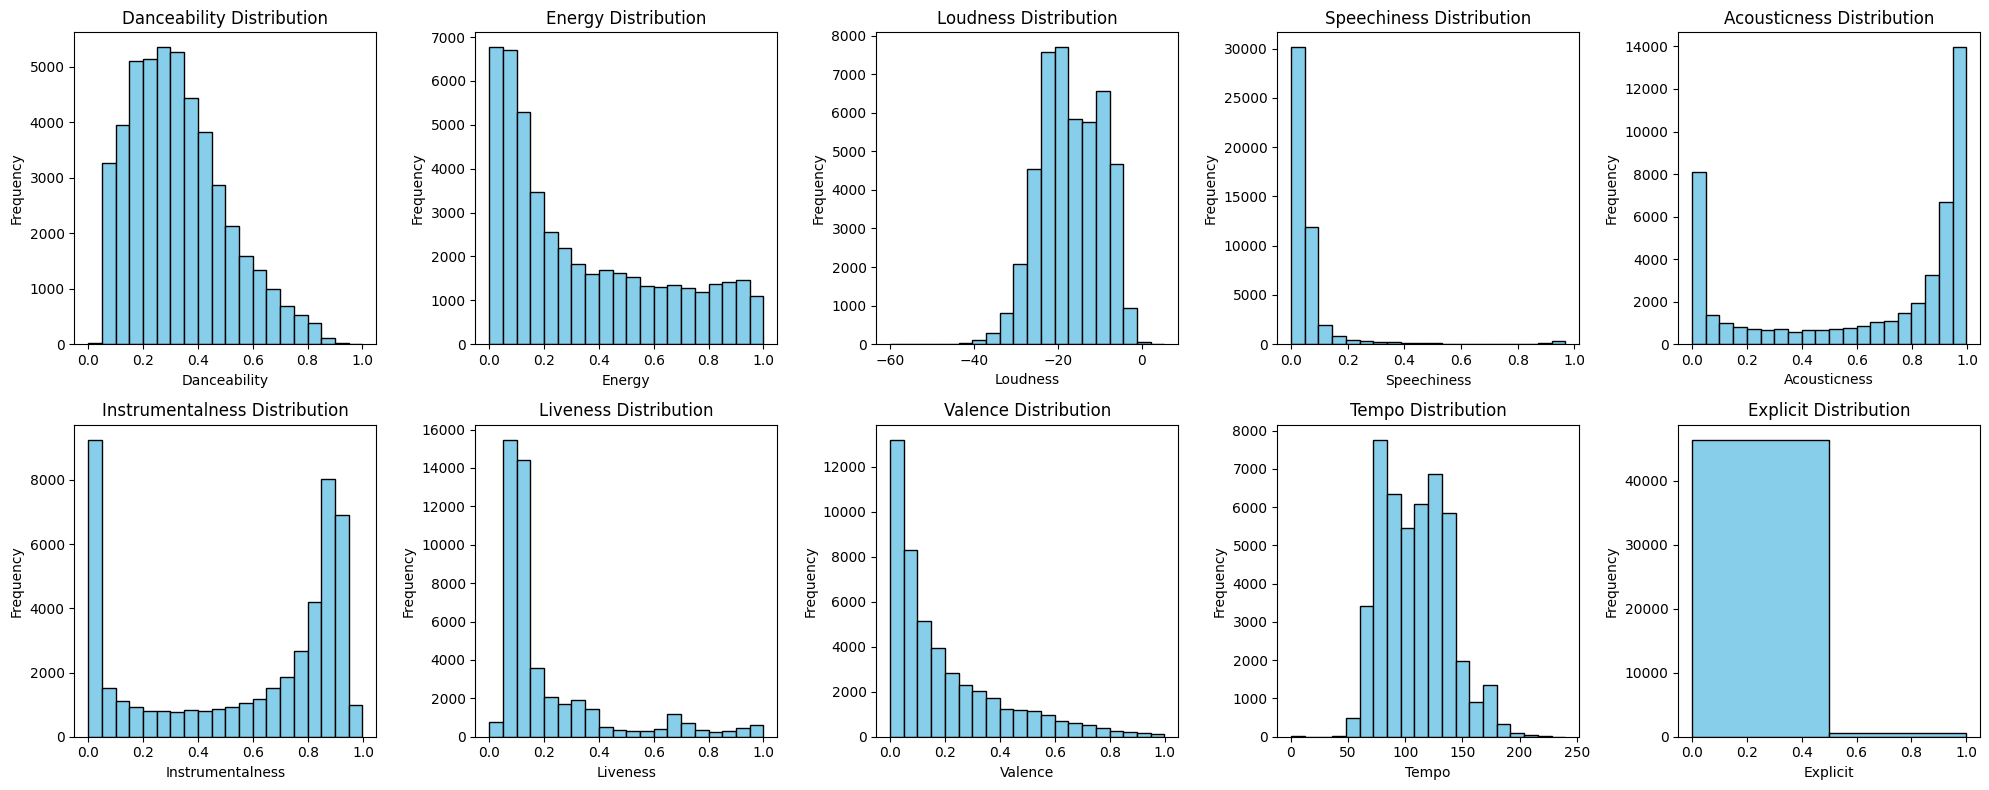

In [39]:
plot_variable_distribution(duration_minutes_outliers)

The outliers related to this section were all above the upper whisker, that is, more than 8 minutes.
Obviously, the energy and Danceablity have decreased or at least it can be said that it is skewed to the right. Acousticness has also decreased and is skewed to the left. Instrumentalness has increased and valence has decreased and it has a skew to the right, which seems reasonable considering the guesses we made regarding the type of these songs. Also, the amount of explicitness here is very low, which shows that swear words are not used in the podcasts and the mentioned cases.

According to the duration of the outliers of this episode and some of their names, we can guess that they are audio books or podcasts or interviews or other things and should be deleted.

### Delete Outliers

In [40]:
df = df.filter(df["year"] >= 1900)
df = df.filter(df["duration_minutes"] <= 8)

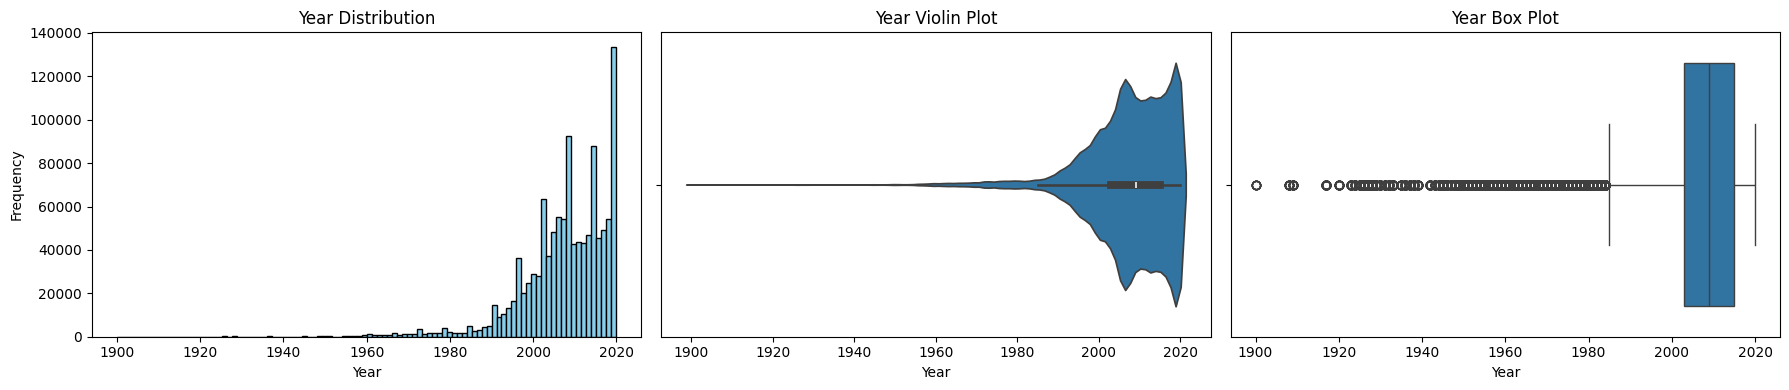

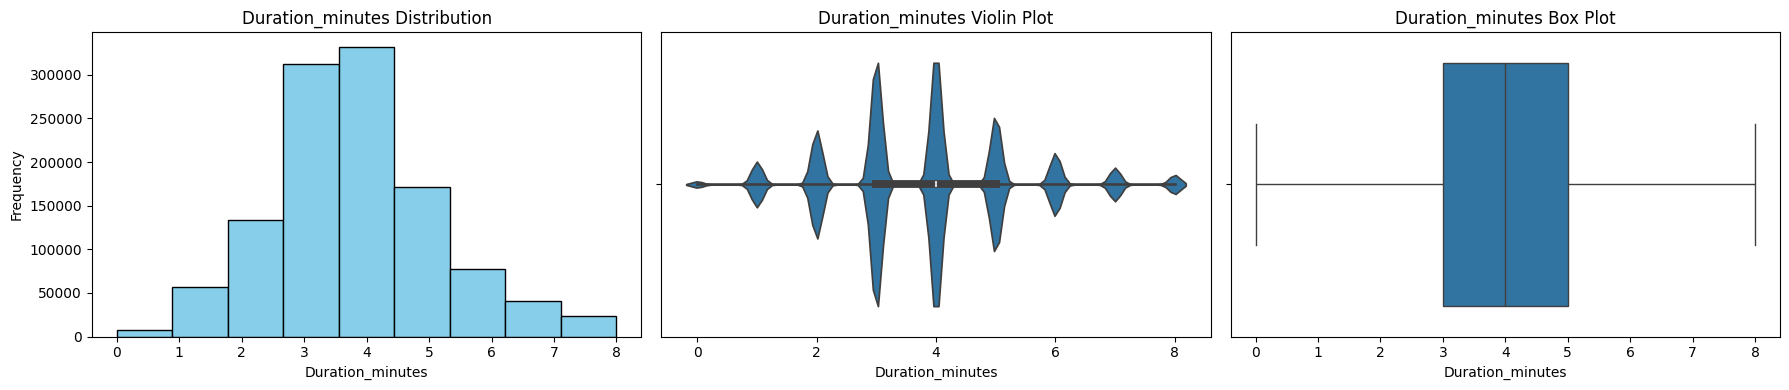

In [41]:
should_do_eda_variables = ["year", "duration_minutes"]
for col in should_do_eda_variables:
    bin_size = df.select([col]).distinct().count()
    do_eda_for_variable(df, col, bin_size)

### Plot on year using aggregate

Now we want to plot different characteristics on year. For this, we have to plot the variables that have similar intervals separately. So we have to get the intervals.

In [42]:
sound_features = ['danceability', 'energy', 'instrumentalness', 'valence', 'liveness', 'speechiness', 'acousticness', 'loudness', 'tempo']
# For each column in your list, calculate the minimum and maximum
for column in sound_features:
    print(column)
    df.select(min(column).alias('Min'), max(column).alias('Max')).show()

danceability
+---+-----+
|Min|  Max|
+---+-----+
|0.0|0.994|
+---+-----+

energy
+---+---+
|Min|Max|
+---+---+
|0.0|1.0|
+---+---+

instrumentalness
+---+---+
|Min|Max|
+---+---+
|0.0|1.0|
+---+---+

valence
+---+---+
|Min|Max|
+---+---+
|0.0|1.0|
+---+---+

liveness
+---+---+
|Min|Max|
+---+---+
|0.0|1.0|
+---+---+

speechiness
+---+-----+
|Min|  Max|
+---+-----+
|0.0|0.969|
+---+-----+

acousticness
+---+-----+
|Min|  Max|
+---+-----+
|0.0|0.996|
+---+-----+

loudness
+-----+-----+
|  Min|  Max|
+-----+-----+
|-60.0|7.234|
+-----+-----+

tempo
+---+------------------+
|Min|               Max|
+---+------------------+
|0.0|248.93400000000003|
+---+------------------+



In [43]:
import pandas as pd
import seaborn as sns
import plotly.express as px

def plot_music_characteristics(df, sound_features):
    col_names = ['year']
    col_names.extend(sound_features)

    df_music_features = (df.sample(.2, seed=42)
                           .groupBy('year')
                           .agg({feature: 'mean' for feature in sound_features})
                           .toDF(*col_names)
                           .orderBy('year')
                           .toPandas()
                           .dropna(axis=0)
                        )
    
    fig = px.line(df_music_features, x='year', y=sound_features, title='Song Characteristics Over the Decades')
    fig.show()

    sns.lineplot(data=pd.melt(df_music_features, ['year']), x='year', y='value', hue='variable').set_title('Song Characteristics Over the Decades')

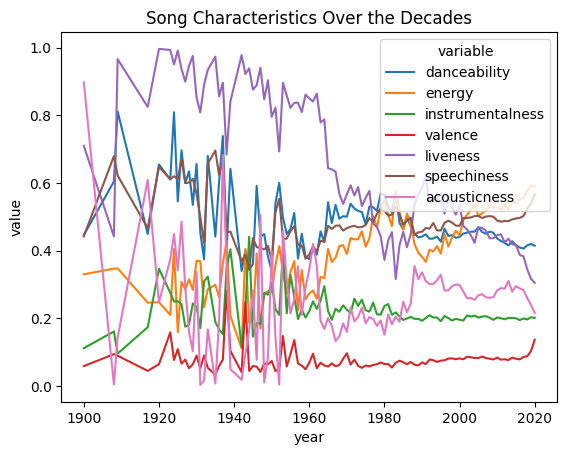

In [44]:
sound_features = ['danceability', 'energy', 'instrumentalness', 'valence', 'liveness', 'speechiness', 'acousticness']
plot_music_characteristics(df, sound_features)


1. **Decrease in Danceability and Liveness**:
   - Rise of Digital Music Technology: The decline in danceability and liveness could be linked to the advancement of digital music technology, which allowed for more precise and polished studio recordings. This trend accelerated notably in the late 20th century with the widespread adoption of digital audio workstations and sampling techniques.
   - Urbanization and Lifestyle Changes: The decline in danceability could also be influenced by broader societal shifts, such as increasing urbanization and changes in leisure activities. As people moved to urban areas, dance halls and live music venues may have become less central to social life, impacting the prominence of live performances and danceable music.

2. **Increase in Energy**:
   - World Wars: During both World War I and II, music served as a crucial tool for boosting morale and rallying national spirit. The energetic music of these periods often reflected the intensity of wartime emotions and the desire for escapism amidst hardship.
   - Economic Boom in the 1980s: The surge in energy during the 1980s could be attributed to the economic prosperity and cultural dynamism of the decade. The booming economy fueled consumerism, innovation in music production technologies, and the rise of MTV and other music video platforms, which emphasized visually stimulating and high-energy performances.

3. **Increase in Valence and Instrumentalness**:
   - World War II: The increase in valence (positiveness) and instrumentalness during World War II can be linked to the role of music as a form of emotional support and escapism during the tumultuous wartime period. Instrumental music, in particular, provided a sense of unity and solace amidst the chaos of war, while upbeat and positive themes in songs offered hope and comfort to listeners.

4. **Increase in Acousticness**:
   - Reaction Against Electronic Dominance: The resurgence of acousticness near the 1980s can be seen as a reaction against the dominance of electronic music in the preceding decades. Musicians and audiences sought a return to more organic sounds and traditional instrumentation, leading to a revival of acoustic-driven genres such as folk rock, acoustic pop, and unplugged performances.
   - Roots Revival: Additionally, the 1980s saw a renewed interest in roots music and Americana, which often featured acoustic instruments and a stripped-down, authentic sound. This revival was partly a response to the perceived artificiality of mainstream pop music and a desire for more genuine and heartfelt expressions in music.


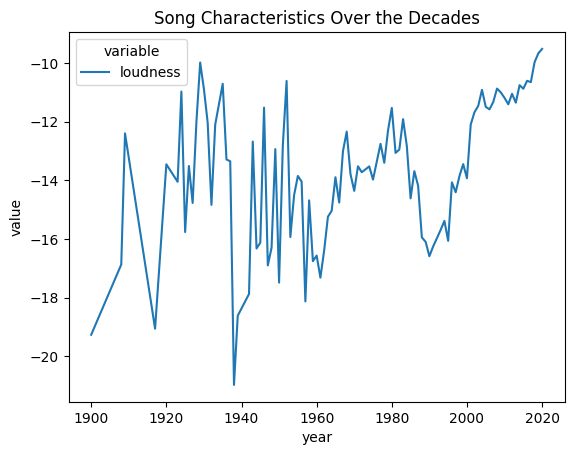

In [45]:
sound_features = ['loudness']
plot_music_characteristics(df, sound_features)

- **1920s**: Introduction of radio broadcasting may have prioritized clarity over loudness in music production.
- **1940s**: Limited resources and focus on acoustic instrumentation during World War II might have led to subdued loudness.
- **1960s**: Analog recording technology and emphasis on expressive performances in countercultural movements may have influenced moderate loudness.
- **1980s**: Widespread adoption of digital recording technology and commercialization of the music industry likely contributed to increased loudness.
- **Recent Strong Upward Trend**: The "loudness war" phenomenon, driven by competition among producers for attention-grabbing recordings, has led to a significant increase in loudness levels.

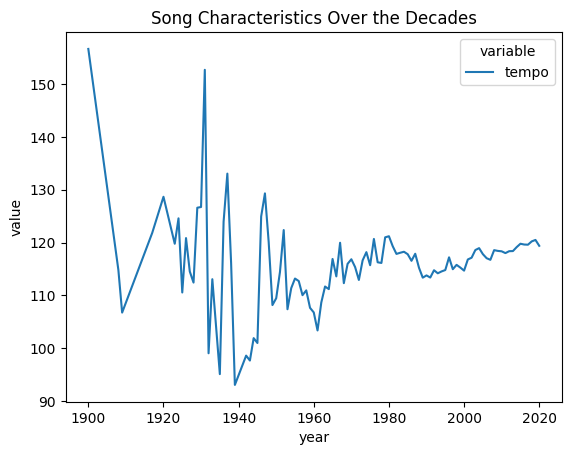

In [46]:
sound_features = ['tempo']
plot_music_characteristics(df, sound_features)

The drop in tempo during the 1940s, amidst the tumult of World War II, likely reflected the somber mood and emotional gravity of the era, with slower tempos and introspective ballads resonating with audiences experiencing the upheaval of war. Following the war's end, the subsequent return to normal tempo levels mirrored the post-war recovery and resurgence of optimism, as economic prosperity and the revival of pre-war musical styles propelled music towards faster tempos and more upbeat rhythms. This shift also coincided with cultural changes, technological advancements, and evolving dance styles, all of which contributed to the fluctuation in tempo and the eventual return to a more energetic musical landscape.

## Correlation

Now we plot a correlation heatmap for numerical columns in a DataFrame using matplotlib and seaborn libraries.

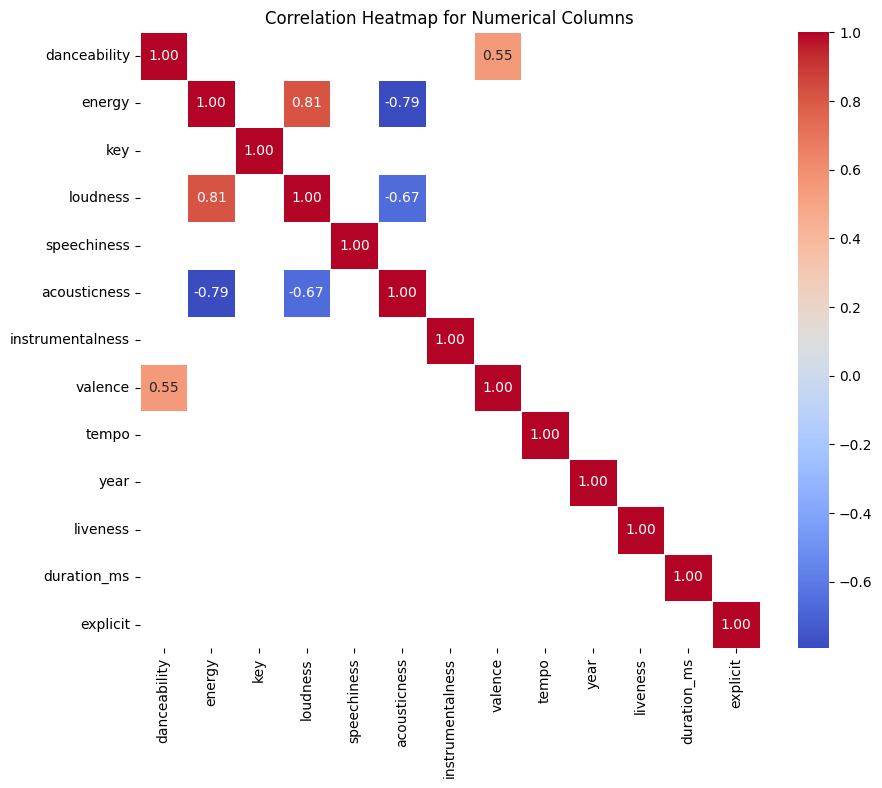

In [47]:
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = ["danceability", "energy","key", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo", "year", "liveness", "duration_ms", "explicit"]
filtered_df = df.select(*numerical_columns)

# Convert DataFrame to Pandas DataFrame
pandas_df = filtered_df.toPandas()
# Calculate correlation matrix
correlation_matrix = pandas_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=(np.abs(correlation_matrix) < 0.4))
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

as we can see there are high correlation between (energy, loudness) and (dancability, valence) and (energy, acousticness) and (acousticness, loudness). In order to see if they really have a high correlation or not, we have to draw their pairplot.

0.8139451362393889


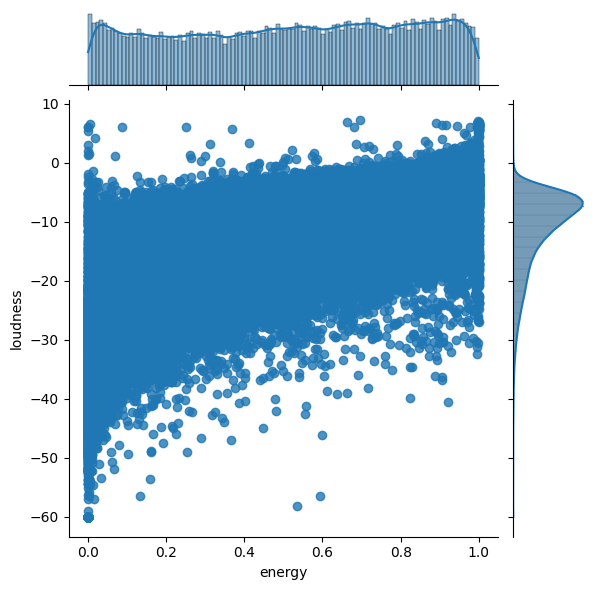

In [48]:
sns.jointplot(x = 'energy' , y = 'loudness' , data=pandas_df ,kind= 'reg')
print(pandas_df['energy'].corr(pandas_df['loudness']))

The correlation is 0.8, but due to the large number of outliers, we cannot see the linear relationship in the pairplot because of outliers.

-0.7932944387919364


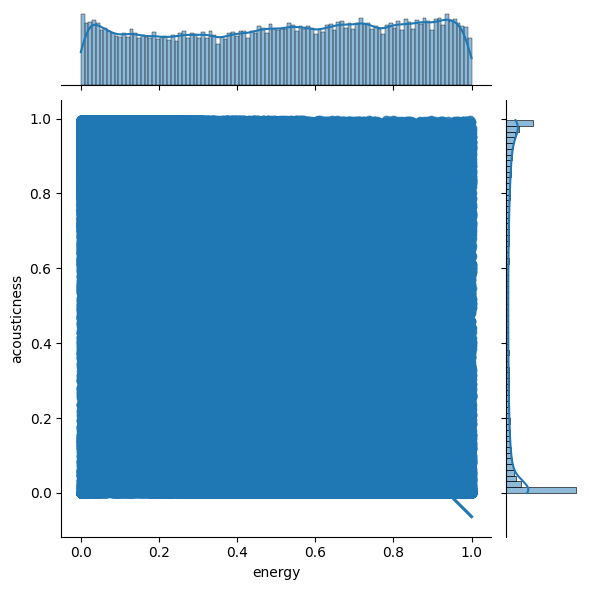

In [49]:
sns.jointplot(x = 'energy' , y = 'acousticness' , data=pandas_df ,kind= 'reg')
print(pandas_df['energy'].corr(pandas_df['acousticness']))

Same as previous plot.

## PCA

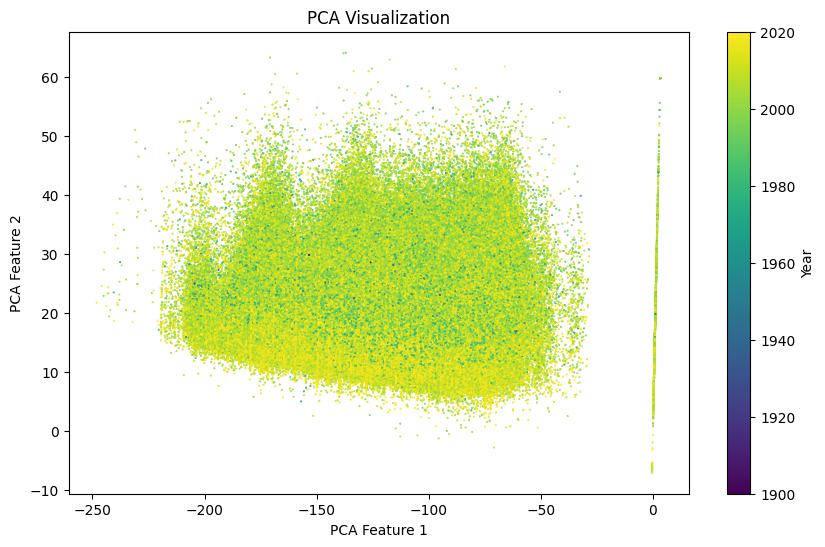

In [50]:
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.sql.functions import col

# Assuming you have a SparkSession initialized as 'spark'

# Create a vector column from the desired features
feature_cols = ["danceability", "energy", "loudness", "speechiness",
                "acousticness", "liveness", "valence", "tempo"]
vector_col = "feature_vector"
assembler = VectorAssembler(inputCols=feature_cols, outputCol=vector_col)
df = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Perform PCA
pca = PCA(k=2, inputCol=vector_col, outputCol="pca_features")
pca_model = pca.fit(train_data)

# Transform the data
train_pca = pca_model.transform(train_data)
test_pca = pca_model.transform(test_data)

# Get the PCA components
components = pca_model.pc.toArray()

# Convert the PCA features to a pandas DataFrame for plotting
import pandas as pd
train_pca_pdf = train_pca.select("pca_features", "year").toPandas()
train_pca_pdf['pca_feature1'] = train_pca_pdf['pca_features'].apply(lambda x: float(x[0]))
train_pca_pdf['pca_feature2'] = train_pca_pdf['pca_features'].apply(lambda x: float(x[1]))

# Plot the PCA features
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(train_pca_pdf['pca_feature1'], train_pca_pdf['pca_feature2'], c=train_pca_pdf['year'], cmap='viridis', marker='.', s=1)
plt.colorbar(label='Year')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA Visualization')
plt.show()

The PCA visualization reveals a dense yellow region at the center, indicating a cluster of data points with similar characteristics, surrounded by scattered yellow points suggesting outliers or distinct feature values. The color scale suggests data points are colored based on a specific variable, possibly tempo or energy. While PCA aids in dimensionality reduction, understanding the principal components' relationship to original variables needs further analysis and domain knowledge. It offers an exploratory analysis of data structure and potential clustering based on audio features but requires additional investigation for interpreting specific variable-component relationships. Notably, the clustering might fall short of expectations, suggesting potential room for improvement in data analysis techniques or feature selection.

# Part 5 - Exploring Top-K Records

In [51]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc, explode, max, min, split
import matplotlib.pyplot as plt
import plotly.express as px
from pyspark.sql.functions import array_contains
from pyspark.sql.functions import explode

In [52]:
# Artists with the most songs
explode_df = df.withColumn("artist", explode(split(col("artists"), ", ")))
artist_counts = explode_df.groupBy("artist").count()
artist_counts = artist_counts.orderBy(col("count").desc())
result_df = artist_counts.limit(10).toPandas()
fig = px.bar(result_df, y='artist', x='count', title='Artists with the Most Songs')
fig.show()


The most prolific artists are the artists of wordless music.

In [53]:
# Artists with the least number of songs
explode_df = df.withColumn("artist", explode(split(col("artists"), ", ")))
artist_counts = explode_df.groupBy("artist").count()
artist_counts = artist_counts.orderBy(col("count").asc())
result_df = artist_counts.limit(10).toPandas()
fig = px.bar(result_df, y='artist', x='count', title='Artists with the least number of songs')
fig.show()

In [54]:
result_df = (df.groupBy("artists")
               .count()
               .orderBy("count", ascending=False)
               .limit(10)
               .toPandas()
            )
px.bar(result_df, y='artists', x='count', title='Most fits occurred')

Here, the most repeated name is Varoius artists, which shows that the number of readers is large or it is not clear who they are.

In [55]:
# Albums with the most songs
sorted_albums = df.groupBy("album").count().orderBy(desc("count")).toPandas()
sorted_albums = sorted_albums.sort_values(by="count", ascending=False)
fig = px.bar(sorted_albums.head(10), x='count', y='album', orientation='h', title='Top Albums by Number of Songs')
fig.show()

In [56]:
# Artists with the most explicit music
df_explicit = df.filter(col("explicit") == True)
df_explicit = df_explicit.withColumn("artist", explode(split(col("artists"), ", ")))
explicit_artist_counts = df_explicit.groupBy("artist").count()
explicit_artist_counts = explicit_artist_counts.orderBy(col("count").desc())

explicit_result_df = explicit_artist_counts.limit(10).toPandas()
fig = px.bar(explicit_result_df, y='artist', x='count', 
             title='Artists with the Most Explicit Songs', 
             labels={'artist': 'Artist', 'count': 'Explicit Song Count'})
fig.show()


As expected, the artists with the highest amount of explicit songs are in the field of rap and heavy metal, which is obvious.

In [57]:
# Most Frequent Song Names
result_df = (df.groupBy("name")
               .count()
               .orderBy("count", ascending=False)
               .limit(10)
               .toPandas()
            )
px.bar(result_df, y='name', x='count', title='Most Frequent Song Names')

In [58]:
def find_top_for_characteristic(characteristic):
    df_characteristic = df.select("artists", characteristic)
    df_characteristic = df_characteristic.withColumn("artist", explode(split(col("artists"), ", ")))
    artist_characteristic_avg = df_characteristic.groupBy("artist").avg(characteristic)
    artist_characteristic_avg = artist_characteristic_avg.orderBy(col(f"avg({characteristic})").desc())
    top_artists_characteristic = artist_characteristic_avg.limit(20)
    top_artists_characteristic_df = top_artists_characteristic.toPandas()

    fig = px.bar(top_artists_characteristic_df, x=f'avg({characteristic})', y='artist', 
                orientation='h', 
                title=f'Artists with the Highest {characteristic}', 
                labels={f'avg({characteristic})': f'Average {characteristic}', 'artist': 'Artist'})
    fig.show()

    df_characteristic = df.select("artists", characteristic)
    df_characteristic = df_characteristic.withColumn("artist", explode(split(col("artists"), ", ")))
    artist_characteristic_avg = df_characteristic.groupBy("artist").avg(characteristic)
    artist_characteristic_avg = artist_characteristic_avg.orderBy(col(f"avg({characteristic})").asc())
    top_artists_characteristic = artist_characteristic_avg.limit(20)
    top_artists_characteristic_df = top_artists_characteristic.toPandas()

    fig = px.bar(top_artists_characteristic_df, x=f'avg({characteristic})', y='artist', 
                orientation='h', 
                title=f'Artists with at lowest {characteristic}', 
                labels={f'avg({characteristic})': f'Average {characteristic}', 'artist': 'Artist'})
    fig.show()

In [59]:
find_top_for_characteristic("valence")

In [60]:
find_top_for_characteristic("energy")

In [61]:
find_top_for_characteristic("danceability")

In [62]:
find_top_for_characteristic("liveness")

# Questions

## Question 1

Lazy evaluation is a technique employed in Spark and Hadoop to optimize data processing by deferring the evaluation of expressions until their results are actually needed. This helps in performance optimization by avoiding unnecessary computations and optimizing the execution plan.

Example: Suppose you create an RDD of numbers in Spark and then apply a map and filter operation on it. Spark does not immediately execute these transformations but instead builds a Directed Acyclic Graph (DAG) of the transformations. It's only when you invoke a final action like collect that Spark evaluates this DAG and performs the actual computations.

## Question 2

Parquet files utilize a columnar storage format, where data is stored column-by-column on disk. This allows for efficient compression and encoding techniques, resulting in reduced storage requirements. Additionally, parquet files support predicate pushdown, meaning that during query execution, only the relevant columns are read from disk, reducing I/O operations and improving query performance.

In contrast, CSV files store data row-by-row, which can lead to inefficiencies when processing large datasets. CSV files also lack built-in compression and have limitations in supporting complex data types.

## Question 3

In Spark, you can use the checkpoint() method on a DataFrame or RDD to persist intermediate results to a reliable storage system like HDFS or S3. This can be beneficial when you have multiple computation steps and want to avoid recomputing from scratch in case of failures. By checkpointing, Spark stores the intermediate results in a fault-tolerant location, enabling recovery when needed.


## Question 4

One approach is to partition the streaming data by date. This involves organizing the data into separate directories or files based on the date. For example, you can store data for each day in a separate partition. Partitioning by date allows for efficient data pruning and filtering based on the date column during query execution, as the query engine can skip partitions that do not contain the relevant date range, improving query performance.

Another solution is to store the streaming data in the Parquet file format, which is a columnar storage format that supports effective compression and encoding, resulting in smaller file sizes and faster query performance. Parquet files store data column-by-column, enabling predicate pushdown and faster filtering based on specific columns like date.

## Question 5

Pandas:
- Data Size: Suitable for medium-sized datasets that can fit into memory (up to a few gigabytes).
- Processing Complexity: Ideal for data cleaning, manipulation, exploratory data analysis, and small to medium-scale data processing tasks.
- User Experience: Provides a user-friendly interface and is well-suited for interactive data analysis and prototyping.

PySpark:
- Data Size: Best suited for processing large-scale datasets that require distributed computing (terabytes or petabytes of data).
- Processing Complexity: Excels in handling complex data transformations, machine learning tasks, and big data processing pipelines.
- User Experience: Offers scalability, fault tolerance, and parallel processing capabilities for handling massive datasets efficiently, but may require more expertise to optimize performance.